### 📑 자료 분석
- 쥐가 공포에 노출되었을 때, 대뇌 피질에서 분비되는 단백질의 종류 및 양,  
  쥐에게 주사한 약물 등에 따라 다운 증후군 발현 여부를 이진 분류한 데이터 세트

### Features
- MouseID: 각 쥐 개체를 구분하기 위한 ID
- DYRK1A_N ~ CaNA_N: 쥐의 대뇌 피질에서 발견된 단백질(77종)과 해당 단백질 분비량
- Genotype: 실험에 사용된 쥐의 종류
> - Control: 대조군
> - Ts65Dn: 다운 증후군 유전자 보유

- Treatment: 쥐에게 주사한 약물 종류
> - Memantine: 메만틴, 치매 치료제의 일종
> - Saline: 식염수

- Behavior: 쥐가 전에 공포 상황을 겪은 적 있는지를 나타내는 지표
> - C/S: 겪은 적 있음
> - S/C: 겪은 적 없음

### Target
- class: feature에 따른 쥐의 종류 구분
> - 기존에는 투여한 약물과 공포 상황 경험 여부를 포함하여 8가지로 분류하지만,  
이번 프로젝트에서는 정상 / 다운 증후군 발현으로 이진 분류

### 🔎 데이터 세트 확인

In [1]:
import pandas as pd

# 데이터 세트 불러오기
md_df = pd.read_csv('./datasets/mouse_down_syndrome.csv')

md_df

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


In [2]:
# 데이터 세트 정보 확인
md_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

### 💻 데이터 전처리

#### 결측치 조정
- 모든 컬럼의 데이터 수를 1080개로 조정

In [3]:
# 결측치 개수 확인
md_df.isna().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [4]:
# 컬럼 별 수치 데이터 확인
md_df.describe().T

,count,mean,std,min,25%,50%,75%,max
DYRK1A_N,1077.0,0.425810,0.249362,0.145327,0.288121,0.366378,0.487711,2.516367
ITSN1_N,1077.0,0.617102,0.251640,0.245359,0.473361,0.565782,0.698032,2.602662
BDNF_N,1077.0,0.319088,0.049383,0.115181,0.287444,0.316564,0.348197,0.497160
NR1_N,1077.0,2.297269,0.347293,1.330831,2.057411,2.296546,2.528481,3.757641
NR2A_N,1077.0,3.843934,0.933100,1.737540,3.155678,3.760855,4.440011,8.482553
...,...,...,...,...,...,...,...,...
SYP_N,1080.0,0.446073,0.066432,0.258626,0.398082,0.448459,0.490773,0.759588
H3AcK18_N,900.0,0.169609,0.059402,0.079691,0.125848,0.158240,0.197876,0.479763
EGR1_N,870.0,0.183135,0.040406,0.105537,0.155121,0.174935,0.204542,0.360692
H3MeK4_N,810.0,0.205440,0.055514,0.101787,0.165143,0.193994,0.235215,0.413903


#### 중간 분석
- 결측치가 발생한 feature들의 평균(mean)과 중간값(50%, median)이 대체로 비슷함
- 따라서 결측치는 평균값으로 채움

In [5]:
# 결측치 채우기 전 데이터 세트 복사
pre_md_df = md_df.copy()

pre_md_df

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


In [6]:
# 결측치 발생 feature만 가져옴
loss_features = pre_md_df.columns[pre_md_df.isna().any()]

loss_features

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'BAD_N', 'BCL2_N', 'pCFOS_N',
       'H3AcK18_N', 'EGR1_N', 'H3MeK4_N'],
      dtype='object')

In [7]:
# 해당 feature들의 결측치를 평균(mean)으로 채움
for feature in loss_features:
    pre_md_df[feature] = pre_md_df[feature].fillna(pre_md_df[feature].mean())
    print(pre_md_df[feature].isna().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [8]:
# 각 feature별 결측치 보유 여부 다시 출력
pre_md_df.isna().any().value_counts()

False    82
Name: count, dtype: int64

In [9]:
# 각 feature별 수치 데이터 출력
pre_md_df.describe().T

,count,mean,std,min,25%,50%,75%,max
DYRK1A_N,1080.0,0.425810,0.249015,0.145327,0.288163,0.366540,0.487574,2.516367
ITSN1_N,1080.0,0.617102,0.251290,0.245359,0.473669,0.566365,0.697500,2.602662
BDNF_N,1080.0,0.319088,0.049314,0.115181,0.287650,0.316703,0.348039,0.497160
NR1_N,1080.0,2.297269,0.346810,1.330831,2.059152,2.297269,2.528035,3.757641
NR2A_N,1080.0,3.843934,0.931802,1.737540,3.160287,3.763306,4.425107,8.482553
...,...,...,...,...,...,...,...,...
SYP_N,1080.0,0.446073,0.066432,0.258626,0.398082,0.448459,0.490773,0.759588
H3AcK18_N,1080.0,0.169609,0.054222,0.079691,0.133969,0.169609,0.187174,0.479763
EGR1_N,1080.0,0.183135,0.036261,0.105537,0.159168,0.183135,0.196133,0.360692
H3MeK4_N,1080.0,0.205440,0.048069,0.101787,0.174271,0.205440,0.219242,0.413903


#### 중간 분석
- RRP1_N feature에서 일반적으로는 있을 수 없는 마이너스 값이 발견됨
- 해당 값을 0으로 만드는 것도 고려했지만,  
  도메인 지식으로는 발현율이 0이 될 수는 있지만 특수한 경우에만 발생한다고 답변
- 따라서 해당 데이터 제거

#### 이상치 제거

In [10]:
# RRP1_N 값이 0 이하인 데이터 전부 제거
pre_md_df = pre_md_df[pre_md_df['RRP1_N'] > 0]

# 인덱스 번호 초기화
pre_md_df.reset_index(drop=True, inplace=True)

pre_md_df

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1075,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


In [11]:
# 수치 데이터 출력
pre_md_df.describe().T

,count,mean,std,min,25%,50%,75%,max
DYRK1A_N,1079.0,0.425931,0.249099,0.145327,0.288149,0.366568,0.487620,2.516367
ITSN1_N,1079.0,0.617212,0.251381,0.245359,0.473566,0.566743,0.697677,2.602662
BDNF_N,1079.0,0.319090,0.049337,0.115181,0.287582,0.316702,0.348092,0.497160
NR1_N,1079.0,2.297351,0.346960,1.330831,2.058572,2.297269,2.528184,3.757641
NR2A_N,1079.0,3.844660,0.931928,1.737540,3.162474,3.763512,4.430075,8.482553
...,...,...,...,...,...,...,...,...
SYP_N,1079.0,0.445987,0.066403,0.258626,0.398067,0.448435,0.490714,0.759588
H3AcK18_N,1079.0,0.169609,0.054247,0.079691,0.133942,0.169609,0.187314,0.479763
EGR1_N,1079.0,0.183012,0.036054,0.105537,0.159164,0.183135,0.195961,0.360692
H3MeK4_N,1079.0,0.205440,0.048091,0.101787,0.174236,0.205440,0.219248,0.413903


#### 중간 점검
- MouseID: 예측에 불필요하므로 제거
- Genotype: class 컬럼 내 값을 Control 또는 Trosomic으로 바꿀 예정.
  따라서 의미가 중복되므로 제거 
- Behavior: feature명을 Stimulated로 변경. C/S는 Yes, S/C는 No로 데이터 값 변경
- class: feature 명을 Target으로 변경. c-로 시작하는 데이터(대조군, 일반 쥐)는 Control,  
  t-로 시작하는 데이터(다운 증후군 쥐)는 Trisomic으로 데이터 값 변경
- Treatment, Behavior, Target에 레이블 인코더 적용

#### 불필요한 feature 제거

In [12]:
# MouseID, Genotype feature 삭제
pre_md_df = pre_md_df.drop(labels=['MouseID', 'Genotype'], axis=1)

pre_md_df

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Treatment,Behavior,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Memantine,C/S,c-CS-m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Memantine,C/S,c-CS-m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Memantine,C/S,c-CS-m
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Memantine,C/S,c-CS-m
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Saline,S/C,t-SC-s
1075,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Saline,S/C,t-SC-s
1076,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Saline,S/C,t-SC-s
1077,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Saline,S/C,t-SC-s


#### 일부 Feature 및 값의 명칭 변경

In [13]:
# 일부 feature명 변경
pre_md_df = pre_md_df.rename(columns={'Behavior': 'Stimulated',
                         'class': 'Target'})

pre_md_df

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Treatment,Stimulated,Target
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Memantine,C/S,c-CS-m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Memantine,C/S,c-CS-m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Memantine,C/S,c-CS-m
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Memantine,C/S,c-CS-m
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Saline,S/C,t-SC-s
1075,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Saline,S/C,t-SC-s
1076,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Saline,S/C,t-SC-s
1077,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Saline,S/C,t-SC-s


In [14]:
# Stimulated에 들어가는 값 분포 출력
pre_md_df['Stimulated'].value_counts()

Stimulated
S/C    554
C/S    525
Name: count, dtype: int64

In [15]:
# Stimulated에 들어가는 값 변경
pre_md_df['Stimulated'] = pre_md_df['Stimulated'].apply(lambda x: "Yes" if x == "C/S" else "No")

pre_md_df

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Treatment,Stimulated,Target
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Memantine,Yes,c-CS-m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Memantine,Yes,c-CS-m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Memantine,Yes,c-CS-m
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Memantine,Yes,c-CS-m
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Memantine,Yes,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Saline,No,t-SC-s
1075,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Saline,No,t-SC-s
1076,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Saline,No,t-SC-s
1077,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Saline,No,t-SC-s


In [16]:
# 값 적용 여부 출력
pre_md_df['Stimulated'].value_counts()

Stimulated
No     554
Yes    525
Name: count, dtype: int64

In [17]:
# Target에 들어가는 값 변경
pre_md_df['Target'] = pre_md_df['Target'].apply(lambda x: 'Control' if x.split('-')[0] == 'c' else 'Trisomic')

pre_md_df

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Treatment,Stimulated,Target
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Memantine,Yes,Control
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Memantine,Yes,Control
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Memantine,Yes,Control
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Memantine,Yes,Control
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Memantine,Yes,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Saline,No,Trisomic
1075,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Saline,No,Trisomic
1076,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Saline,No,Trisomic
1077,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Saline,No,Trisomic


#### 레이블 인코딩 

In [18]:
from sklearn.preprocessing import LabelEncoder

# 일부 feature에 레이블 인코더 적용
columns = ['Treatment', 'Stimulated', 'Target']
encoders = {}

for column in columns:
    encoder = LabelEncoder()
    pre_md_df[column] = encoder.fit_transform(pre_md_df[column].tolist())
    encoders[column] = encoder.classes_.tolist()

encoders

{'Treatment': ['Memantine', 'Saline'],
 'Stimulated': ['No', 'Yes'],
 'Target': ['Control', 'Trisomic']}

In [19]:
# 인코딩 완료된 데이터 세트 확인
pre_md_df

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Treatment,Stimulated,Target
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,0,1,0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,0,1,0
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,0,1,0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,0,1,0
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,1,0,1
1075,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,1,0,1
1076,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,1,0,1
1077,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,1,0,1


In [20]:
# 현재 데이터 세트 정보 출력
pre_md_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         1079 non-null   float64
 1   ITSN1_N          1079 non-null   float64
 2   BDNF_N           1079 non-null   float64
 3   NR1_N            1079 non-null   float64
 4   NR2A_N           1079 non-null   float64
 5   pAKT_N           1079 non-null   float64
 6   pBRAF_N          1079 non-null   float64
 7   pCAMKII_N        1079 non-null   float64
 8   pCREB_N          1079 non-null   float64
 9   pELK_N           1079 non-null   float64
 10  pERK_N           1079 non-null   float64
 11  pJNK_N           1079 non-null   float64
 12  PKCA_N           1079 non-null   float64
 13  pMEK_N           1079 non-null   float64
 14  pNR1_N           1079 non-null   float64
 15  pNR2A_N          1079 non-null   float64
 16  pNR2B_N          1079 non-null   float64
 17  pPKCAB_N      

### 데이터 분포 시각화

array([[<Axes: title={'center': 'DYRK1A_N'}>,
        <Axes: title={'center': 'ITSN1_N'}>,
        <Axes: title={'center': 'BDNF_N'}>,
        <Axes: title={'center': 'NR1_N'}>,
        <Axes: title={'center': 'NR2A_N'}>,
        <Axes: title={'center': 'pAKT_N'}>,
        <Axes: title={'center': 'pBRAF_N'}>,
        <Axes: title={'center': 'pCAMKII_N'}>,
        <Axes: title={'center': 'pCREB_N'}>],
       [<Axes: title={'center': 'pELK_N'}>,
        <Axes: title={'center': 'pERK_N'}>,
        <Axes: title={'center': 'pJNK_N'}>,
        <Axes: title={'center': 'PKCA_N'}>,
        <Axes: title={'center': 'pMEK_N'}>,
        <Axes: title={'center': 'pNR1_N'}>,
        <Axes: title={'center': 'pNR2A_N'}>,
        <Axes: title={'center': 'pNR2B_N'}>,
        <Axes: title={'center': 'pPKCAB_N'}>],
       [<Axes: title={'center': 'pRSK_N'}>,
        <Axes: title={'center': 'AKT_N'}>,
        <Axes: title={'center': 'BRAF_N'}>,
        <Axes: title={'center': 'CAMKII_N'}>,
        <Axes: tit

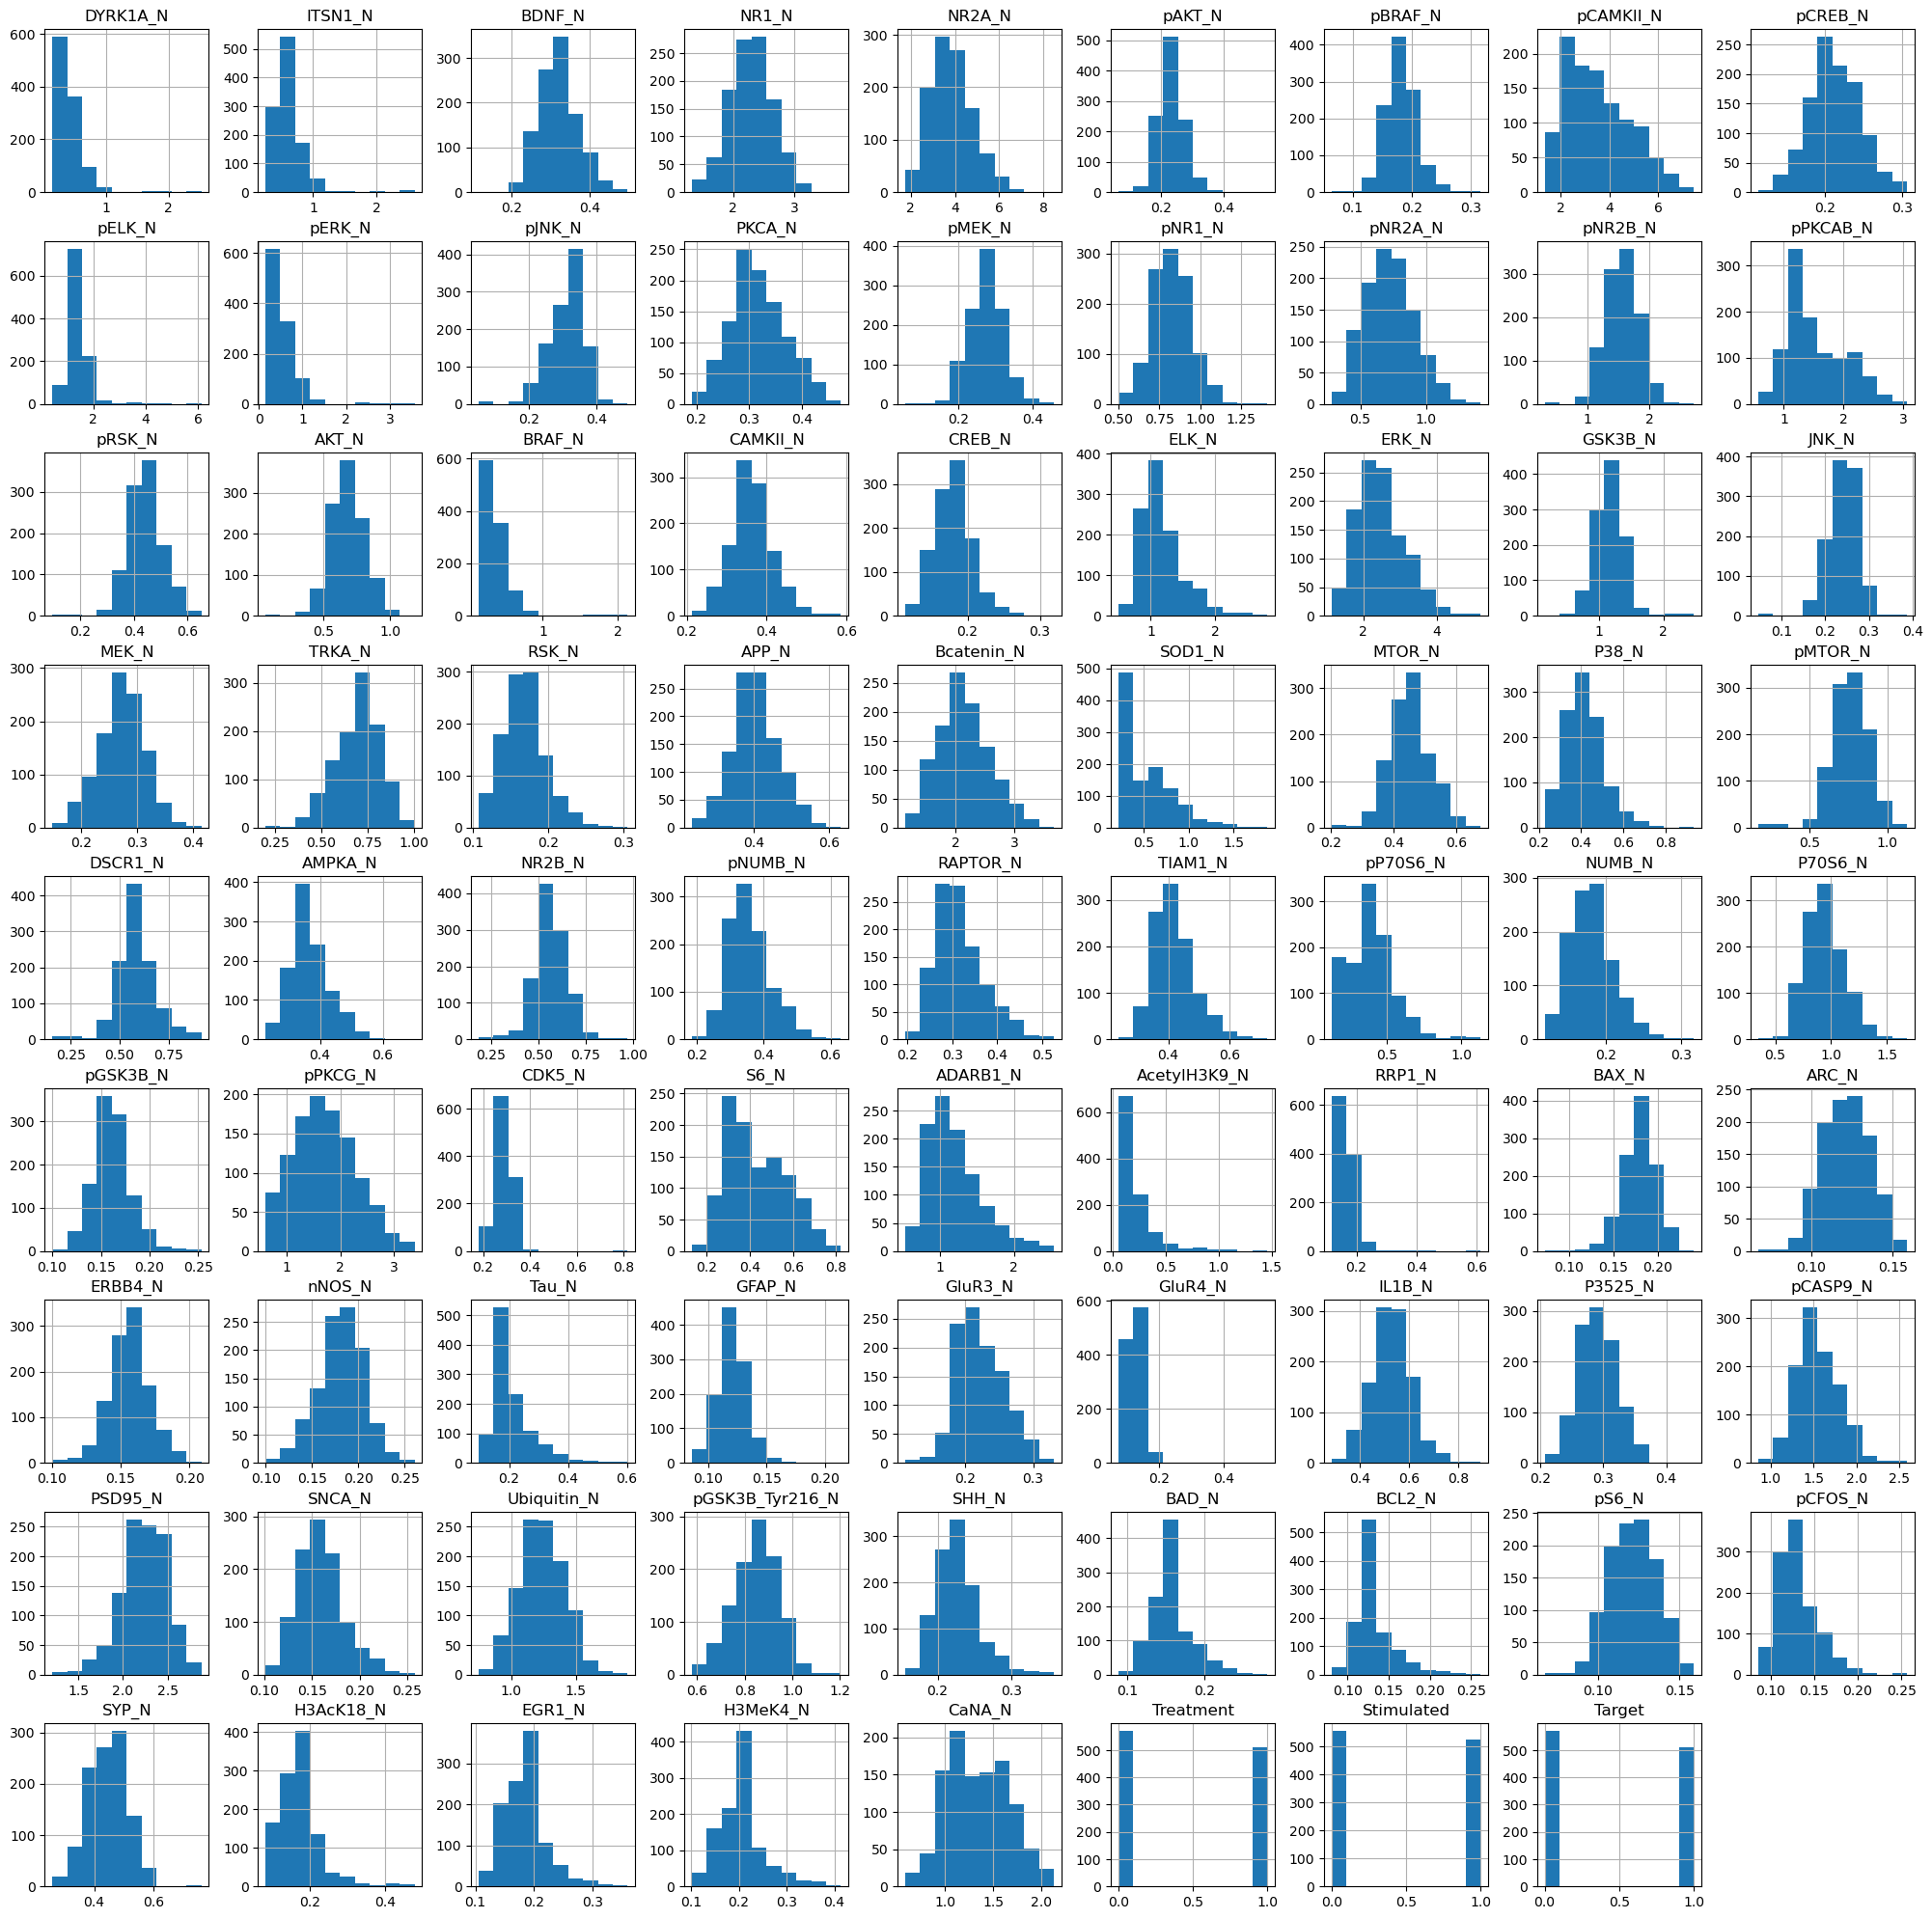

In [21]:
# 칵 컬럼의 데이터 분포 시각화
pre_md_df.hist(figsize=(25, 25))

In [22]:
# Target의 데이터 분포 출력
pre_md_df['Target'].value_counts()

Target
0    569
1    510
Name: count, dtype: int64

### 각 feature 간 상관관계 시각화

Text(0.5, 1.0, 'Correlation')

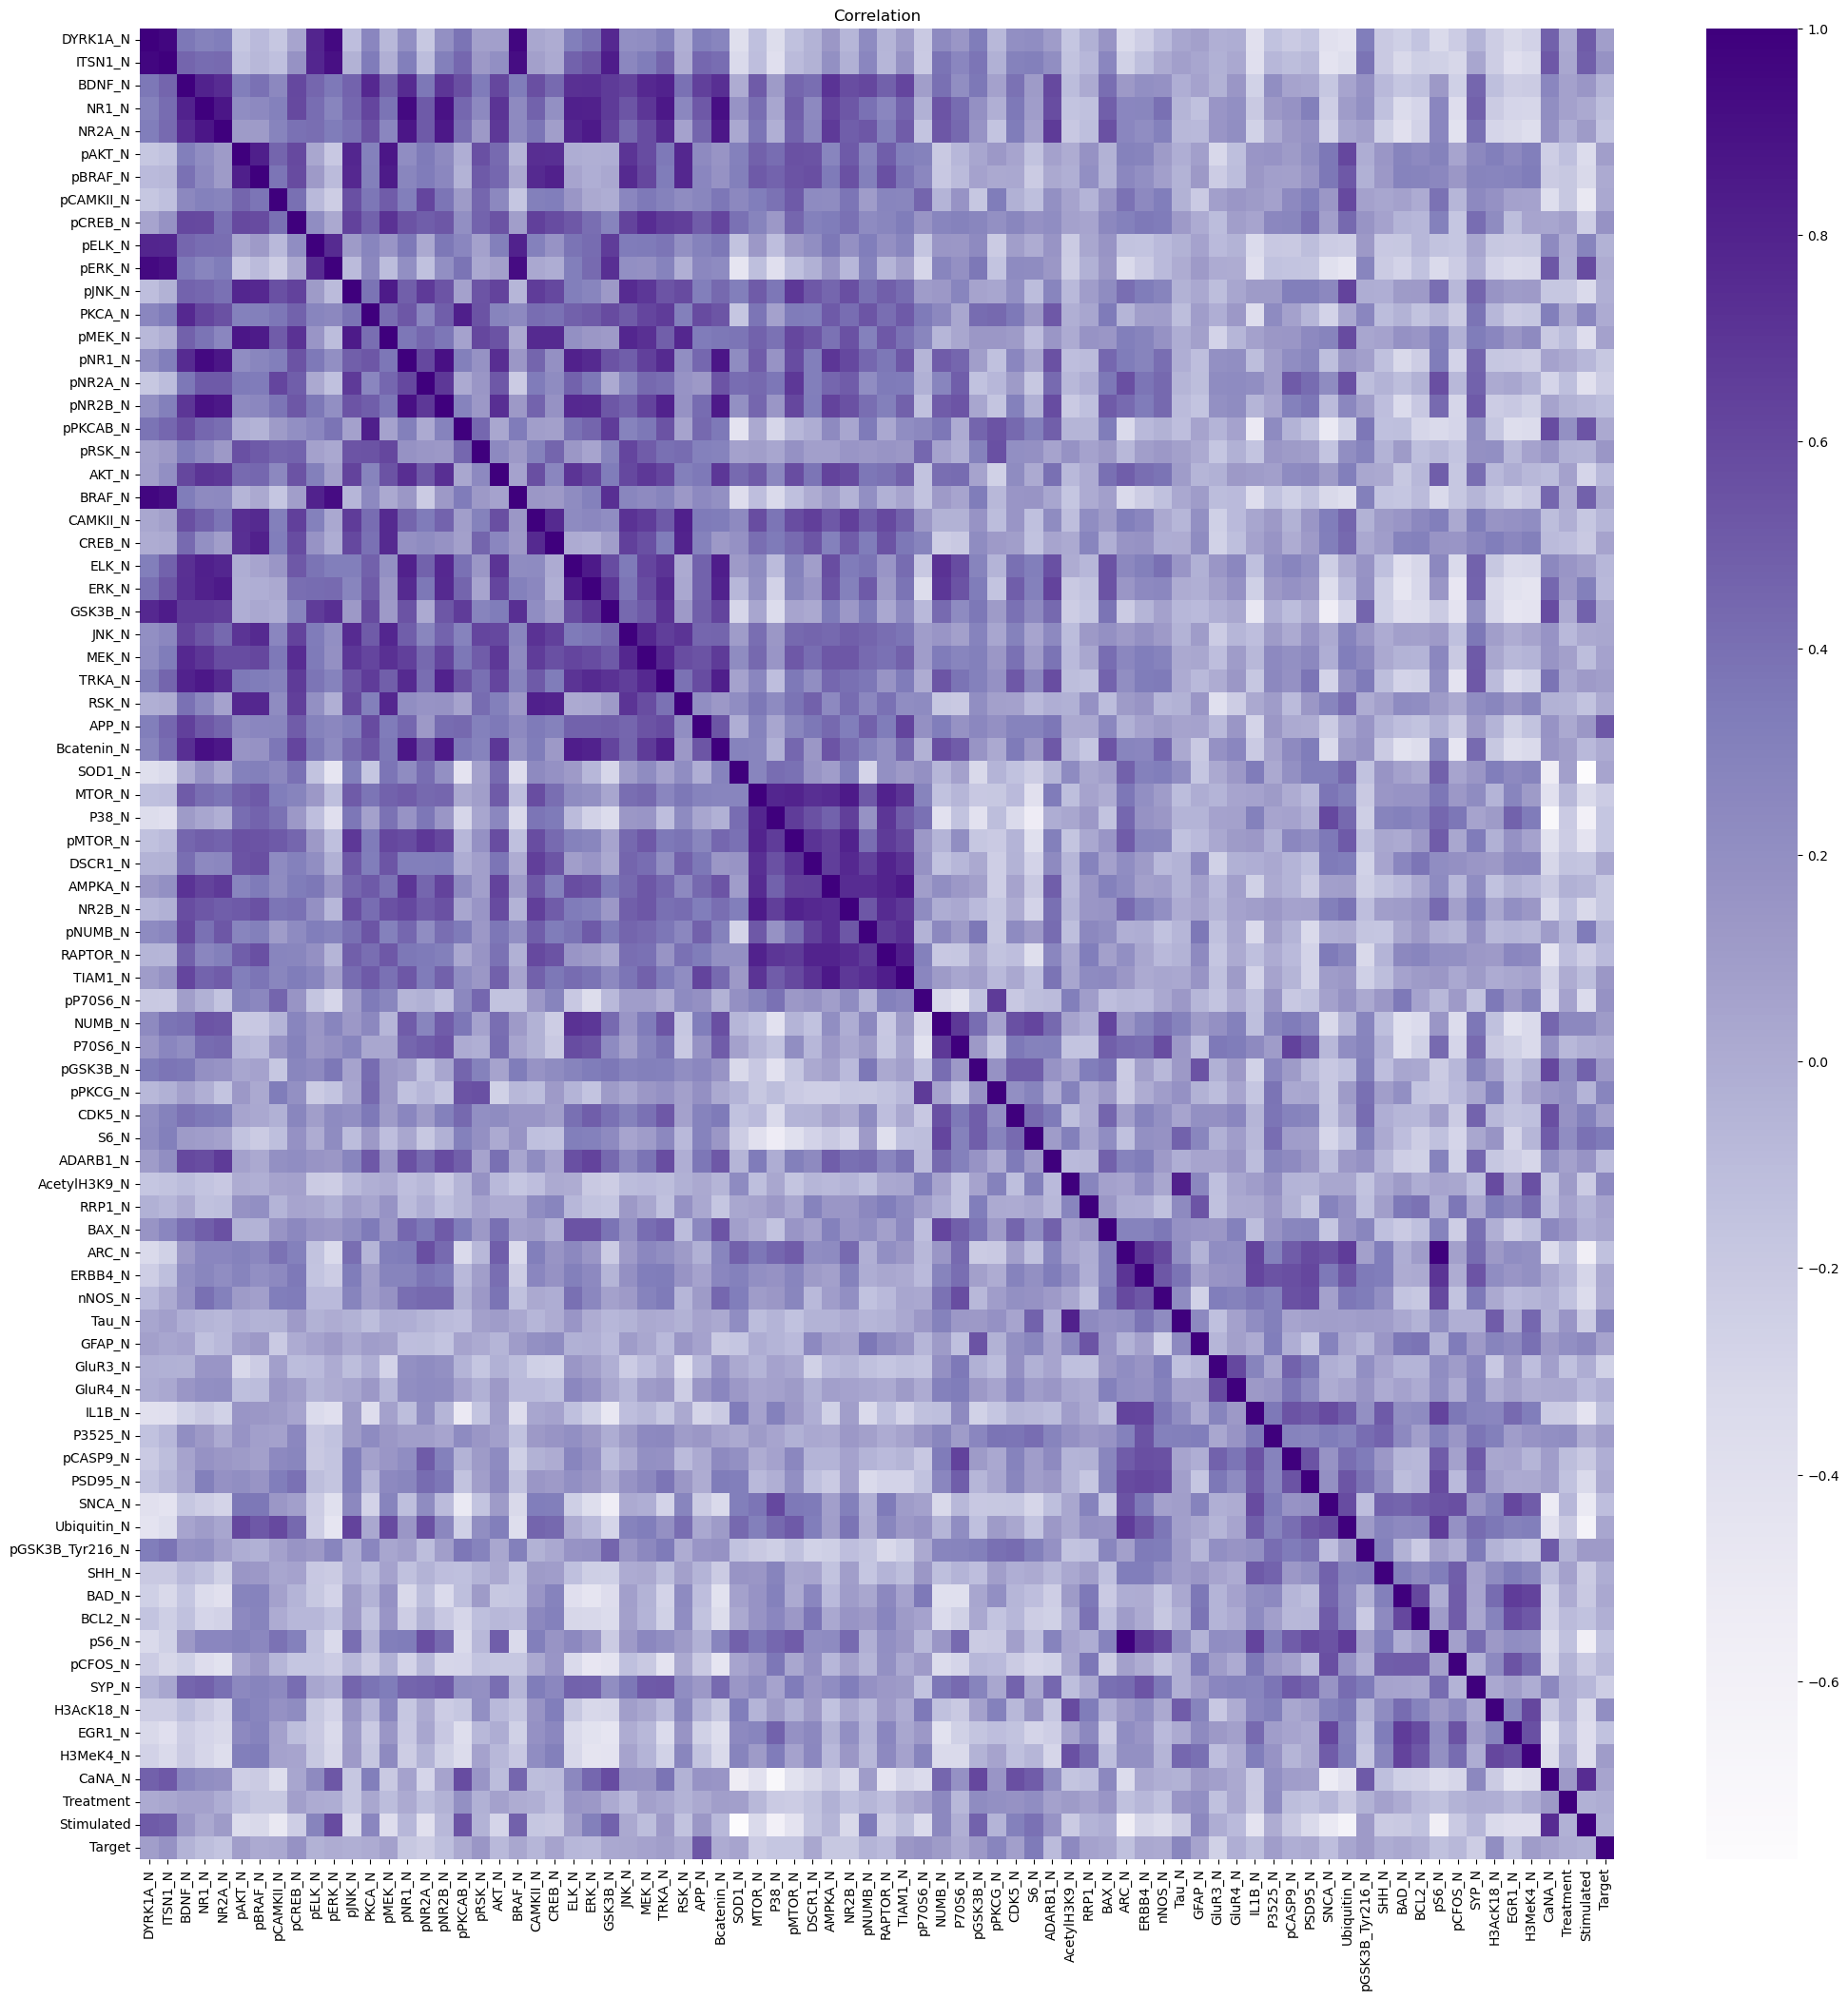

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 컬럼의 상관관계를 히트맵으로 출력
corr = pre_md_df.corr()
fig = plt.figure(figsize=(25, 25))
heatmap = sns.heatmap(corr, cmap="Purples")
heatmap.set_title("Correlation")

In [24]:
# Target과 feature들의 상관관계도 출력
corr[['Target']].sort_values(by="Target", ascending=False)[1:]

,Target
APP_N,0.522546
S6_N,0.342479
pPKCG_N,0.273608
Tau_N,0.271800
AcetylH3K9_N,0.243450
...,...
AMPKA_N,-0.190395
MTOR_N,-0.224680
SYP_N,-0.226786
pNR2A_N,-0.228249


#### 중간 분석
- 현재 Target과의 상관관계가 가장 상위 5개의 feature들은  
  APP_N, S6_N, pPKCG_N, Tau_N, GluR3_N(음의 상관관계)
- Target의 데이터 분포가 균일하지 않은 것을 확인
- 이는 예측 성능에 영향을 줄 수 있기에, 데이터 세트 분할 과정에서  
  SMOTE를 사용하여 Target의 데이터 분포를 균일하게 맞춰서 해결

### 데이터 세트 분할 

In [25]:
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE

# 데이터 세트를 학습용과 테스트용으로 분할
features, targets = pre_md_df.iloc[:, :-1], pre_md_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
                        train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# SMOTE로 오버 샘플링 실행
smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# SMOTE 적용 전후의 데이터 분포 출력
print(f'SMOTE 적용 전:\n{y_train.value_counts()}')
print(f'SMOTE 적용 후:\n{y_train_over.value_counts()}')

SMOTE 적용 전:
Target
0    455
1    408
Name: count, dtype: int64
SMOTE 적용 후:
Target
0    455
1    455
Name: count, dtype: int64


### 🤖 프로젝트의 방향성
- 본 데이터 세트를 통한 예측은 아래에 특히 민감할 필요가 있다고 판단
> - FN: 다운 증후군이 있는 쥐를 정상이라 예측하는 경우

- FP(정상인 쥐를 다운 증후군이라 예측하는 경우)를 감지하고 정밀도를 향상시키는 것 역시 중요하지만,  
  본 프로젝트에서는 FN의 비율을 낮춤으로서 높은 재현율을 보이는 모델을 찾는 것이 중요하다고 판단

- 또한 과적합 발생 시, 새롭게 들어오는 데이터에 대한 예측 성능이 저하될 수 있기 때문에  
  과적합 여부도 관찰하면서 진행

### 학습 진행
- 여러 가지 분류 모델을 통한 학습 진행

> 1. DTC (DecisionTreeClassifier)

> 2. SVM (SVC)

> 3. KNN (KNeighborsClassifier)

### 1. DTC (결정 트리 분류 모델)

In [26]:
from sklearn.tree import DecisionTreeClassifier

# 별도의 하이퍼 파라미터 설정 없이 학습 진행
dtc = DecisionTreeClassifier()

dtc.fit(X_train_over, y_train_over)

DecisionTreeClassifier()

In [27]:
from sklearn.tree import export_graphviz

# graphviz를 이용하여 위 모델의 분류 알고리즘을 .dot 파일로 생성
export_graphviz(
    dtc,
    out_file="./images/downs_syndrome_dtc01.dot",
    class_names=encoders['Target'],
    feature_names=features.columns,
    impurity=True,
    filled=True
)

In [28]:
import graphviz

# 위 과정으로 생성된 .dot 파일 불러오기
with open('./images/downs_syndrome_dtc01.dot') as f:
    downs_syndrome_dtc01 = f.read()

downs_syndrome_dtc01_graph = graphviz.Source(downs_syndrome_dtc01)

In [29]:
# 불러온 파일을 .png로 저장
downs_syndrome_dtc01_graph.render(filename='downs_syndrome_dtc01', directory='./images', format='png')

'images\\downs_syndrome_dtc01.png'

<img src='./images/downs_syndrome_dtc01.png'>

#### 중간 분석
- 교차 검증에 사용할 하이퍼 파라미터는 max_depth는 3, 4, 5 / min_samples_split은 40, 60, 80으로 설정

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 교차 검증 파라미터 설정
dtc_parameters = {
    'dtc__max_depth': [3, 4, 5],
    'dtc__min_samples_split': [40, 60, 80]
}

# 표준화 -> 결정 트리 모델 순으로 진행하는 파이프라인 생성 
# 교차검증이 적용된 새로운 결정 트리 분류 모델 생성
dtc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('dtc', dtc)])
g_dtc = GridSearchCV(dtc_pipe, param_grid=dtc_parameters, cv=5, refit=True, return_train_score=True)

g_dtc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('dtc', DecisionTreeClassifier())]),
             param_grid={'dtc__max_depth': [3, 4, 5],
                         'dtc__min_samples_split': [40, 60, 80]},
             return_train_score=True)

In [31]:
# 하이퍼 파라미터 조합 별 평가 점수 및 순위를 데이터프레임에 담아서 출력
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(dtc_result_df['params'][6])
display(dtc_result_df)

# 가장 높은 평가 점수를 받은 모델을 dtc에 할당
dtc = g_dtc.best_estimator_

{'dtc__max_depth': 5, 'dtc__min_samples_split': 40}


,params,mean_test_score,rank_test_score
0,"{'dtc__max_depth': 3, 'dtc__min_samples_split'...",0.841758,7
1,"{'dtc__max_depth': 3, 'dtc__min_samples_split'...",0.841758,7
2,"{'dtc__max_depth': 3, 'dtc__min_samples_split'...",0.841758,7
3,"{'dtc__max_depth': 4, 'dtc__min_samples_split'...",0.863736,2
4,"{'dtc__max_depth': 4, 'dtc__min_samples_split'...",0.857143,5
5,"{'dtc__max_depth': 4, 'dtc__min_samples_split'...",0.857143,5
6,"{'dtc__max_depth': 5, 'dtc__min_samples_split'...",0.889011,1
7,"{'dtc__max_depth': 5, 'dtc__min_samples_split'...",0.860440,4
8,"{'dtc__max_depth': 5, 'dtc__min_samples_split'...",0.861538,3


#### 중간 분석
- 임의로 설정한 하이퍼 파라미터의 조합들 중 max_depth는 5,  
  min_samples_split은 40으로 설정한 모델의 평가 점수가 가장 높은 것을 확인

#### 각 feature의 중요도
- 파이프라인은 feature importance를 지원하지 않기 때문에 permutation importance만 출력

In [32]:
from sklearn.inspection import permutation_importance

# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(dtc, X_test, y_test, n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

APP_N: 0.2779
AMPKA_N: 0.2015
NR2A_N: 0.0316
GluR3_N: 0.0281
DYRK1A_N: 0.0281
pAKT_N: 0.0162
pPKCG_N: 0.0157
pNR2A_N: 0.0116
SYP_N: 0.0068
GSK3B_N: 0.0062
CREB_N: 0.0042
pGSK3B_Tyr216_N: 0.004
H3AcK18_N: 0.0003
ERK_N: 0.0
JNK_N: 0.0
MEK_N: 0.0
RSK_N: 0.0
TRKA_N: 0.0
ITSN1_N: 0.0
Bcatenin_N: 0.0
SOD1_N: 0.0
MTOR_N: 0.0
P38_N: 0.0
pMTOR_N: 0.0
ELK_N: 0.0
AKT_N: 0.0
CAMKII_N: 0.0
BRAF_N: 0.0
pRSK_N: 0.0
DSCR1_N: 0.0
BDNF_N: 0.0
pNR2B_N: 0.0
pNR1_N: 0.0
pMEK_N: 0.0
PKCA_N: 0.0
pJNK_N: 0.0
pERK_N: 0.0
pELK_N: 0.0
pCREB_N: 0.0
pBRAF_N: 0.0
NR1_N: 0.0
pPKCAB_N: 0.0
Stimulated: 0.0
NR2B_N: 0.0
SHH_N: 0.0
IL1B_N: 0.0
P3525_N: 0.0
pCASP9_N: 0.0
PSD95_N: 0.0
SNCA_N: 0.0
Ubiquitin_N: 0.0
BAD_N: 0.0
Treatment: 0.0
BCL2_N: 0.0
pS6_N: 0.0
pCFOS_N: 0.0
EGR1_N: 0.0
H3MeK4_N: 0.0
CaNA_N: 0.0
GluR4_N: 0.0
GFAP_N: 0.0
Tau_N: 0.0
nNOS_N: 0.0
RAPTOR_N: 0.0
TIAM1_N: 0.0
pP70S6_N: 0.0
NUMB_N: 0.0
P70S6_N: 0.0
pGSK3B_N: 0.0
CDK5_N: 0.0
S6_N: 0.0
ADARB1_N: 0.0
AcetylH3K9_N: 0.0
RRP1_N: 0.0
BAX_N: 0.0
ARC_N: 0.0

#### 오차 행렬

In [33]:
# 오차 행렬을 출력 및 시각화 해주는 함수
# SMOTE를 통해 타겟 데이터의 분포를 균일하게 맞췄기 때문에 macro 방식으로 평균 산출 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction, average='macro')
#     재현율
    recall = recall_score(y_test , prediction, average='macro')
#     F1 score
    f1 = f1_score(y_test, prediction, average='macro')
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction, average='macro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'\
          .format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [34]:
# 결정 트리 모델로 테스트 데이터 예측
dtc_prediction = dtc.predict(X_test)

오차 행렬
[[103  11]
 [ 16  86]]
정확도: 0.8750, 정밀도: 0.8761, 재현율: 0.8733, F1: 0.8742, ROC-AUC: 0.8733
################################################################################


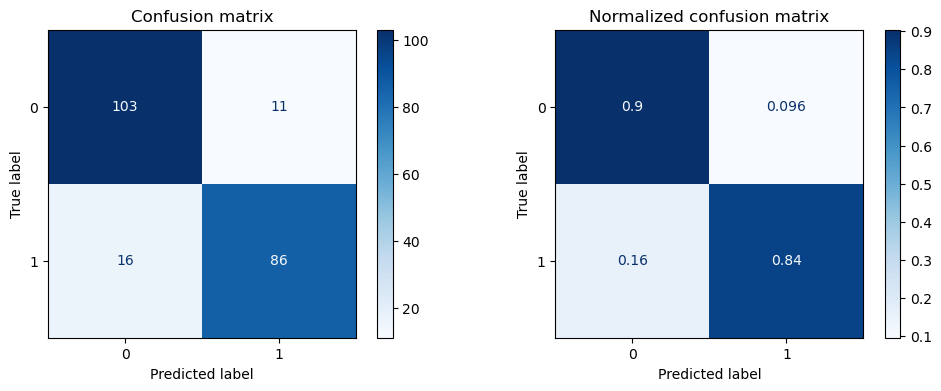

In [35]:
# 오차 행렬 출력
get_evaluation(y_test, dtc_prediction, dtc, X_test)

#### Precision / Recall Trade-off

In [36]:
from sklearn.metrics import precision_recall_curve

# 정밀도와 재현율의 변경 지점을 threshold 변수에 담아서 출력
proba_class1 = dtc.predict_proba(X_test)[:, 1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([0.        , 0.02040816, 0.02631579, 0.03422053, 0.07352941,
       0.25      , 0.26666667, 0.33333333, 0.7826087 , 0.875     ,
       0.8974359 , 0.9875    , 0.99512195, 1.        ])

In [37]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# 정밀도와 재현율의 trade-off를 시각화하는 함수 선언
def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

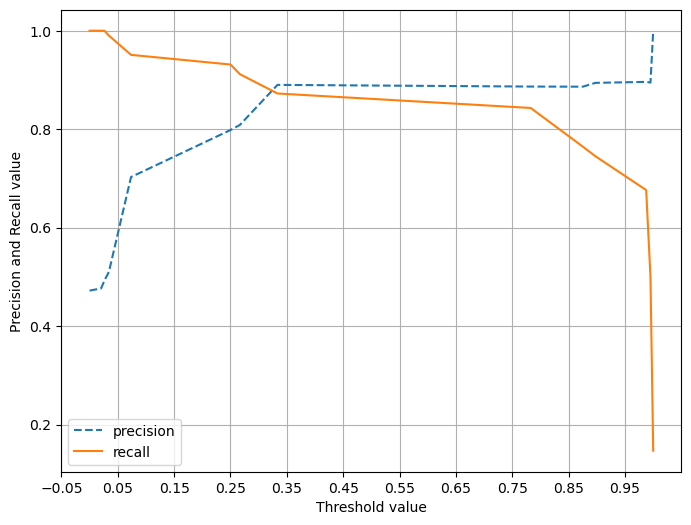

In [38]:
# 위 함수를 사용하여 정밀도와 재현율의 trade-off 시각화
precision_recall_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

#### ROC Curve

In [39]:
from sklearn.metrics import roc_curve

# ROC Curve를 시각화해주는 함수
def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

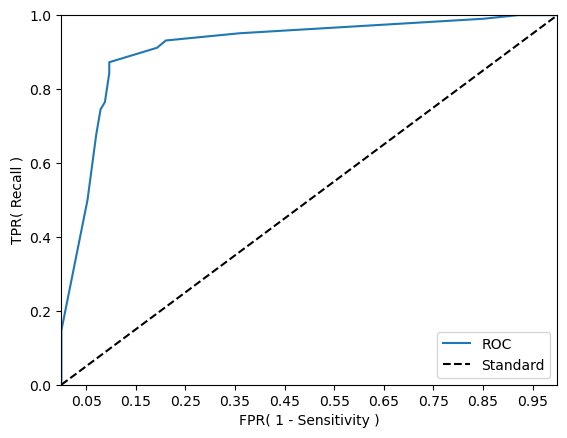

In [40]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

#### 산점도 및 분류 영역 시각화 

In [41]:
import numpy as np

# 데이터의 분포를 산점도로 시각화하고, 모델이 해당 데이터를 분류한 경계와 각 데이터들의 영역을 시각화하는 함수
# 영역의 가시성을 높이기 위해 zorder를 -1로 조정함으로서 영역이 위에 표시되게 함
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=-1)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이터로 model 학습
    model.fit(X.values, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

In [42]:
# feature_importance에서 가장 높은 중요도를 가진 feature 2가지만 가져옴
important_features = features.loc[:, ['APP_N', 'AMPKA_N']]

important_features

,APP_N,AMPKA_N
0,0.453910,0.448099
1,0.430940,0.420876
2,0.423187,0.404630
3,0.410615,0.386860
4,0.398550,0.360816
...,...,...
1074,0.372216,0.270060
1075,0.360990,0.273472
1076,0.309978,0.234679
1077,0.341172,0.258083


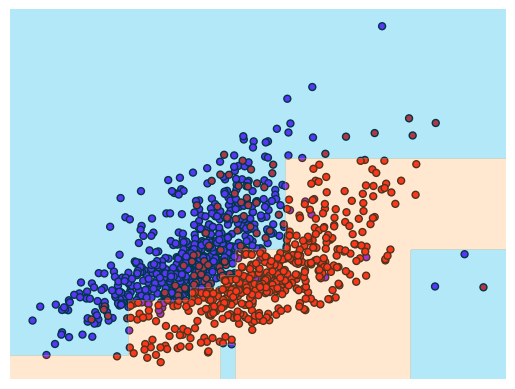

In [43]:
visualize_boundary(dtc, important_features, targets)

#### DTC 모델 학습 결과 
- 결정 트리 분류 모델로 학습한 결과, 평가 지표가 모두 0.87 이상의 높은 수치를 보임
- 또한 과적합 역시 발견되지 않음에 따라 해당 모델이 적절하게 학습되었음을 확인

### 2. SVM (서포트 벡터 머신)

In [44]:
from sklearn.svm import SVC

# SVC에서 사용하는 하이퍼 파라미터 설정
svc_parameters = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                 'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                 'svc__kernel': ['linear', 'rbf']}

# SVC 모델 생성
svc = SVC(probability=True, random_state=124)

svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
g_svc = GridSearchCV(svc_pipe, param_grid=svc_parameters, cv=5, refit=True, return_train_score=True)

In [45]:
# SVC 모델로 학습 진행
g_svc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc',
                                        SVC(probability=True,
                                            random_state=124))]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [46]:
# 하이퍼 파라미터 조합 별 평가 점수 및 순위를 데이터프레임에 담아서 출력
svc_result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(svc_result_df)

,params,mean_test_score,rank_test_score
0,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.839560,44
1,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.736264,52
2,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.839560,44
3,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.795604,50
4,"{'svc__C': 0.001, 'svc__gamma': 0.1, 'svc__ker...",0.839560,44
...,...,...,...
67,"{'svc__C': 100, 'svc__gamma': 1, 'svc__kernel'...",0.618681,55
68,"{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...",0.969231,15
69,"{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...",0.545055,67
70,"{'svc__C': 100, 'svc__gamma': 100, 'svc__kerne...",0.969231,15


In [47]:
# 평가 점수 1위인 컬럼들과 params 출력
print(svc_result_df['params'][51])
svc_result_df[svc_result_df['rank_test_score'] == 1]

# 가장 좋은 평가 점수를 받은 모델을 svc에 할당
svc = g_svc.best_estimator_

{'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


#### 중간 분석
- C를 10 또는 100, gamma는 0.01로 설정하고 rbf 커널을 사용한 모델이 가장 높은 평가 점수를 받은 것을 확인

In [48]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(svc, X_test, y_test, n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

APP_N: 0.0455
ITSN1_N: 0.0037
pCASP9_N: 0.0032
H3MeK4_N: 0.0006
SHH_N: 0.0005
pERK_N: 0.0005
pNR2A_N: 0.0003
DYRK1A_N: 0.0003
pAKT_N: 0.0002
SYP_N: 0.0002
TIAM1_N: 0.0002
MTOR_N: 0.0002
CAMKII_N: 0.0002
BRAF_N: 0.0
RSK_N: 0.0
SOD1_N: 0.0
TRKA_N: 0.0
Bcatenin_N: 0.0
MEK_N: 0.0
JNK_N: 0.0
GSK3B_N: 0.0
P38_N: 0.0
ERK_N: 0.0
ELK_N: 0.0
CREB_N: 0.0
pNR2B_N: 0.0
AKT_N: 0.0
pRSK_N: 0.0
pPKCAB_N: 0.0
DSCR1_N: 0.0
pNR1_N: 0.0
pMEK_N: 0.0
PKCA_N: 0.0
pJNK_N: 0.0
pELK_N: 0.0
pCREB_N: 0.0
pCAMKII_N: 0.0
pBRAF_N: 0.0
NR2A_N: 0.0
NR1_N: 0.0
BDNF_N: 0.0
pMTOR_N: 0.0
Stimulated: 0.0
AMPKA_N: 0.0
NR2B_N: 0.0
GluR3_N: 0.0
GluR4_N: 0.0
IL1B_N: 0.0
P3525_N: 0.0
PSD95_N: 0.0
SNCA_N: 0.0
Ubiquitin_N: 0.0
pGSK3B_Tyr216_N: 0.0
BAD_N: 0.0
BCL2_N: 0.0
pS6_N: 0.0
pCFOS_N: 0.0
H3AcK18_N: 0.0
EGR1_N: 0.0
CaNA_N: 0.0
GFAP_N: 0.0
Tau_N: 0.0
nNOS_N: 0.0
pPKCG_N: 0.0
Treatment: 0.0
RAPTOR_N: 0.0
pP70S6_N: 0.0
NUMB_N: 0.0
P70S6_N: 0.0
pGSK3B_N: 0.0
CDK5_N: 0.0
ERBB4_N: 0.0
S6_N: 0.0
ADARB1_N: 0.0
AcetylH3K9_N: 0.0
RRP1

In [49]:
# SVC 모델로 테스트 데이터 예측
svc_prediction = svc.predict(X_test)

오차 행렬
[[113   1]
 [  0 102]]
정확도: 0.9954, 정밀도: 0.9951, 재현율: 0.9956, F1: 0.9954, ROC-AUC: 0.9956
################################################################################


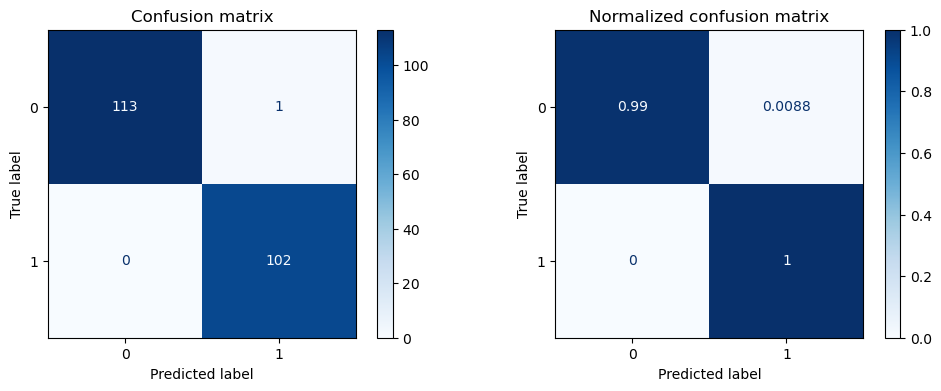

In [50]:
get_evaluation(y_test, svc_prediction, svc, X_test)

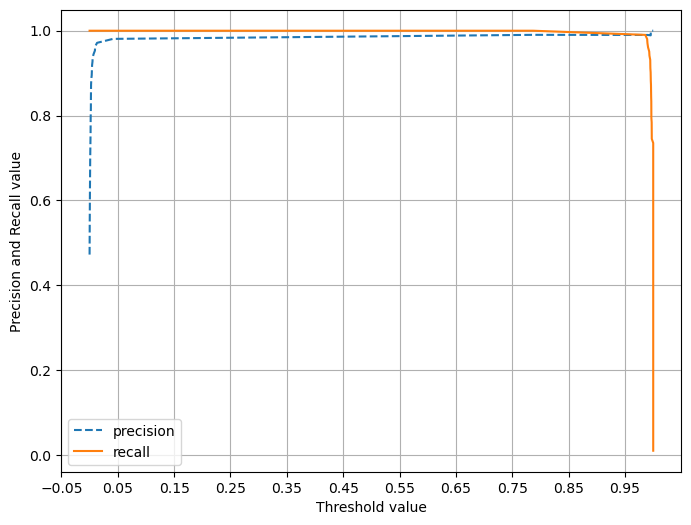

In [51]:
# 위 함수를 사용하여 정밀도와 재현율의 trade-off 시각화
precision_recall_curve_plot(y_test, svc.predict_proba(X_test)[:, 1].reshape(-1, 1))

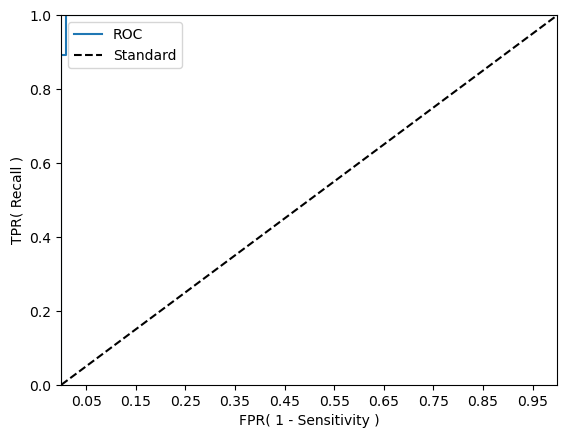

In [52]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, svc.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [53]:
# feature_importance에서 가장 높은 중요도를 가진 feature 2가지만 가져옴
important_features = features.loc[:, ['APP_N', 'ITSN1_N']]

important_features

,APP_N,ITSN1_N
0,0.453910,0.747193
1,0.430940,0.689064
2,0.423187,0.730247
3,0.410615,0.617076
4,0.398550,0.617430
...,...,...
1074,0.372216,0.463591
1075,0.360990,0.474163
1076,0.309978,0.395179
1077,0.341172,0.412894


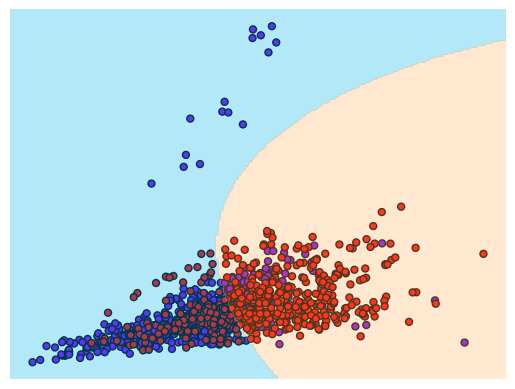

In [54]:
visualize_boundary(svc, important_features, targets)

#### SVC 모델 학습 결과
- SVC 모델로 학습한 결과, 평가 지표가 모두 1에 근접한 수치를 보임
- 또한 산점도와 분류 영역을 시각화한 결과, DTC와는 다른 곡선 경계가 출력되었으며  
  이는 gamma 파라미터의 영향을 보여주는 자료로 판단됨
- 다만, 데이터 분류 영역으로 보아, 과소 적합의 가능성을 배제할 수 없음

### 3. KNN (K-최근접 이웃 알고리즘)

In [55]:
from sklearn.neighbors import KNeighborsClassifier

# KNN에 사용할 하이퍼 파라미터 설정
knn_c_parameters = {'knn__n_neighbors': [3, 5, 7, 9, 11]}

knn = KNeighborsClassifier()

# 데이터 표준화 후 KNN을 거치는 파이프라인을 생성하고
# 이와 하이퍼 파라미터로 교차 검증을 진행하는 모델 생성
knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])
g_knn = GridSearchCV(knn_pipe, param_grid=knn_c_parameters, cv=5, refit=True, return_train_score=True)

In [56]:
# KNN에 학습 방법만 저장
# Lazy Learning 모델이기 때문에 새로운 데이터가 들어와야 학습을 함
g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11]},
             return_train_score=True)

In [57]:
# KNN으로 학습한 결과의 교차 검증결과를 데이터프레임으로 만듬 
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(knn_result_df['params'][0])
display(knn_result_df)

{'knn__n_neighbors': 3}


,params,mean_test_score,rank_test_score
0,{'knn__n_neighbors': 3},0.989011,1
1,{'knn__n_neighbors': 5},0.975824,2
2,{'knn__n_neighbors': 7},0.965934,3
3,{'knn__n_neighbors': 9},0.954945,4
4,{'knn__n_neighbors': 11},0.947253,5


#### 중간 분석
- 이웃한 데이터 수가 3일 때 성능 평가 점수가 가장 높은 것을 확인

In [58]:
# 위에서 얻은 최적의 하이퍼 파라미터 값을 가진 새로운 KNN 모델 및 파이프라인 생성
# KNN에는 best_estimator가 없기 때문에 재선언해야 됨
knn = KNeighborsClassifier(n_neighbors=3)
knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])

# 재선언된 파이프라인을 통해 학습 진행
knn_pipe.fit(X_train_over, y_train_over)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [59]:
# KNN 모델로 예측
knn_prediction = knn_pipe.predict(X_test)

In [60]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(knn_pipe, X_test, y_test, n_repeats=10, random_state=124)
importance.importances_mean.argsort()[::-1]

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

pP70S6_N: 0.0014
pNR2A_N: 0.0009
pCASP9_N: 0.0009
BAD_N: 0.0005
Stimulated: 0.0
MEK_N: 0.0
CAMKII_N: 0.0
CREB_N: 0.0
ELK_N: 0.0
ERK_N: 0.0
GSK3B_N: 0.0
JNK_N: 0.0
TRKA_N: 0.0
AKT_N: 0.0
RSK_N: 0.0
APP_N: 0.0
Bcatenin_N: 0.0
SOD1_N: 0.0
MTOR_N: 0.0
P38_N: 0.0
pMTOR_N: 0.0
BRAF_N: 0.0
pPKCAB_N: 0.0
pRSK_N: 0.0
AMPKA_N: 0.0
ITSN1_N: 0.0
BDNF_N: 0.0
NR1_N: 0.0
NR2A_N: 0.0
pAKT_N: 0.0
pBRAF_N: 0.0
pCAMKII_N: 0.0
pCREB_N: 0.0
pELK_N: 0.0
pERK_N: 0.0
pJNK_N: 0.0
PKCA_N: 0.0
pMEK_N: 0.0
pNR1_N: 0.0
pNR2B_N: 0.0
DSCR1_N: 0.0
pNUMB_N: 0.0
NR2B_N: 0.0
GluR3_N: 0.0
IL1B_N: 0.0
P3525_N: 0.0
PSD95_N: 0.0
SNCA_N: 0.0
Ubiquitin_N: 0.0
pGSK3B_Tyr216_N: 0.0
SHH_N: 0.0
BCL2_N: 0.0
pS6_N: 0.0
pCFOS_N: 0.0
SYP_N: 0.0
H3AcK18_N: 0.0
EGR1_N: 0.0
H3MeK4_N: 0.0
CaNA_N: 0.0
GluR4_N: 0.0
GFAP_N: 0.0
Treatment: 0.0
Tau_N: 0.0
RAPTOR_N: 0.0
TIAM1_N: 0.0
NUMB_N: 0.0
P70S6_N: 0.0
pGSK3B_N: 0.0
pPKCG_N: 0.0
CDK5_N: 0.0
S6_N: 0.0
ADARB1_N: 0.0
AcetylH3K9_N: 0.0
RRP1_N: 0.0
BAX_N: 0.0
ARC_N: 0.0
ERBB4_N: 0.0
nNOS_N: 0.

오차 행렬
[[114   0]
 [  0 102]]
정확도: 1.0000, 정밀도: 1.0000, 재현율: 1.0000, F1: 1.0000, ROC-AUC: 1.0000
################################################################################


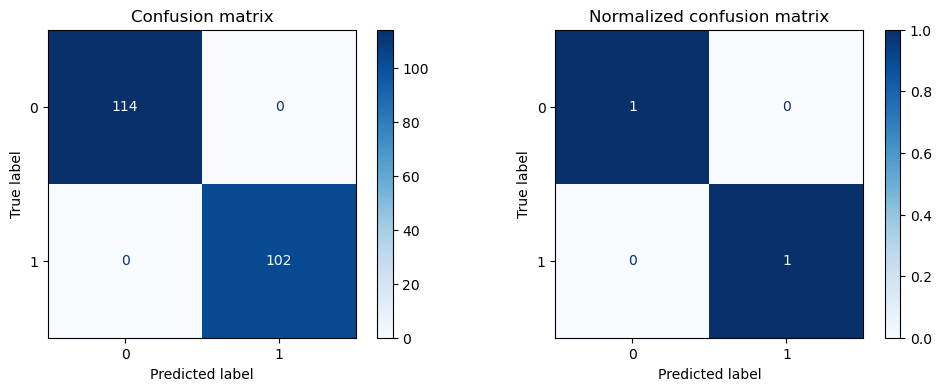

In [61]:
get_evaluation(y_test, knn_prediction, knn_pipe, X_test)

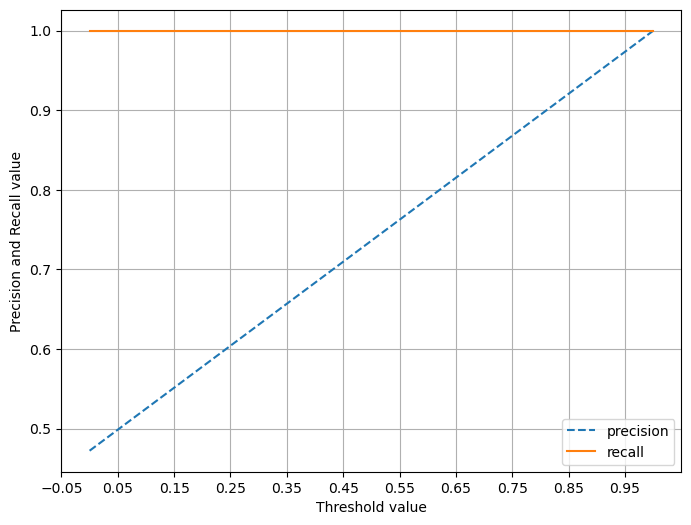

In [62]:
# 위 함수를 사용하여 정밀도와 재현율의 trade-off 시각화
precision_recall_curve_plot(y_test, knn_pipe.predict_proba(X_test)[:, 1].reshape(-1, 1))

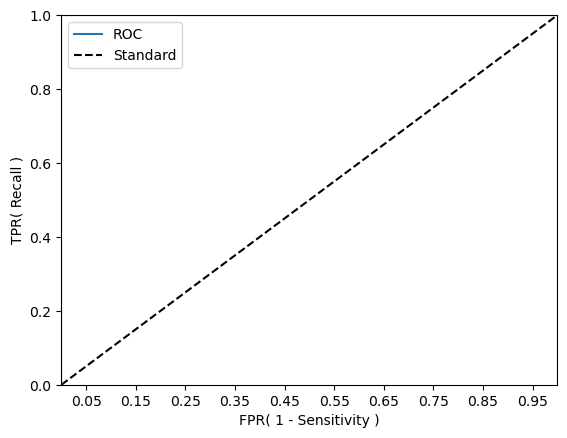

In [63]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, knn_pipe.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [64]:
# feature_importance에서 가장 높은 중요도를 가진 feature 2가지만 가져옴
important_features = features.loc[:, ['pP70S6_N', 'pNR2A_N']]

important_features

,pP70S6_N,pNR2A_N
0,0.294170,0.605673
1,0.276431,0.587559
2,0.256648,0.602449
3,0.398534,0.520293
4,0.393447,0.507990
...,...,...
1074,0.527041,0.510604
1075,0.518377,0.524381
1076,0.460202,0.442638
1077,0.490496,0.479522


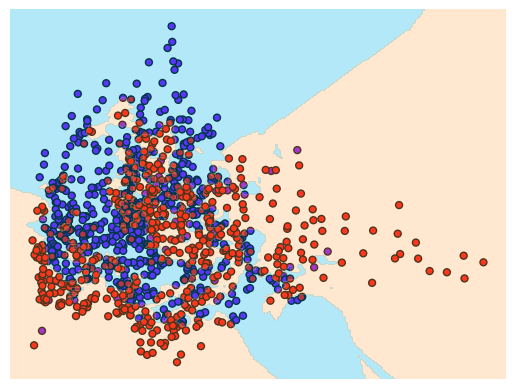

In [65]:
visualize_boundary(knn_pipe, important_features, targets)

### KNN 모델 학습 결과
- KNN 모델 학습 결과 정확도와 오차 행렬이 전부 1로,  
  단 하나의 오답도 없이 테스트 데이터를 정확하게 예측한 것을 확인
- 다만, 산점도 시각화 결과 데이터의 과적합이 발견됨

### 앙상블 학습
1. Voting
> - 위의 모델들을 사용하여 Hard Voting과 Soft Voting 진행

2. Bagging
> - Random Forest

3. Boosting
>- Adaboost
>- GBM
>- XGBoost
>- LightGBM

### 4. Voting 
- 각자의 산점도를 출력하는 과정에서 가장 중요한 feature 2가지로만 다시 학습하는 현상이  
  발생했으니, best_estimator 또는 최적의 하이퍼 파라미터 튜닝을 다시 진행한 다음 Voting 진행

In [66]:
# 하이퍼 파라미터가 최적화된 모델로 재설정
dtc = g_dtc.best_estimator_
svc = g_svc.best_estimator_
knn = KNeighborsClassifier(n_neighbors=3)

dtc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('dtc', dtc)])
svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])

#### 4-1. Hard Voting

In [67]:
from sklearn.ensemble import VotingClassifier

# 위의 모델 별 파이프라인을 통해 Hard Voting을 실행하는 분류 모델 객체 생성
h_vc = VotingClassifier(estimators=[('dtc', dtc_pipe),
                                    ('svc', svc_pipe),
                                    ('knn', knn_pipe)
                                   ],
                        voting='hard',
                        n_jobs=-1)

In [68]:
# Hard Voting 모델로 학습 진행
h_vc.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('dtc',
                                               Pipeline(steps=[('standard_scaler',
                                                                StandardScaler()),
                                                               ('dtc',
                                                                DecisionTreeClassifier(max_depth=5,
                                                                                       min_samples_split=40))]))])),
                             ('svc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('svc',
                                               Pipeline(steps=[('standard_scaler',
                                                                StandardScaler()),
                                                               ('svc',
                                                                SVC(C=10,
                                                                    gamma=0.01,
                                                                    probability=True,
                                                                    random_state=124))]))])),
                             ('knn',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=3))]))],
                 n_jobs=-1)

In [69]:
# Hard Voting 모델로 테스트 데이터 예측
h_vc_prediction = h_vc.predict(X_test)

In [70]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(h_vc, X_test, y_test, n_repeats=10, random_state=124)

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

APP_N: 0.0417
pCASP9_N: 0.0009
pERK_N: 0.0005
SYP_N: 0.0005
Stimulated: 0.0
CAMKII_N: 0.0
ELK_N: 0.0
ERK_N: 0.0
GSK3B_N: 0.0
JNK_N: 0.0
MEK_N: 0.0
RSK_N: 0.0
TRKA_N: 0.0
AKT_N: 0.0
Bcatenin_N: 0.0
SOD1_N: 0.0
MTOR_N: 0.0
P38_N: 0.0
pMTOR_N: 0.0
DSCR1_N: 0.0
BRAF_N: 0.0
pPKCAB_N: 0.0
pRSK_N: 0.0
NR2B_N: 0.0
ITSN1_N: 0.0
BDNF_N: 0.0
NR1_N: 0.0
NR2A_N: 0.0
pAKT_N: 0.0
pBRAF_N: 0.0
pCAMKII_N: 0.0
pCREB_N: 0.0
pELK_N: 0.0
pJNK_N: 0.0
PKCA_N: 0.0
pMEK_N: 0.0
pNR1_N: 0.0
pNR2A_N: 0.0
pNR2B_N: 0.0
AMPKA_N: 0.0
pNUMB_N: 0.0
Treatment: 0.0
SHH_N: 0.0
GluR4_N: 0.0
IL1B_N: 0.0
P3525_N: 0.0
PSD95_N: 0.0
SNCA_N: 0.0
Ubiquitin_N: 0.0
pGSK3B_Tyr216_N: 0.0
BAD_N: 0.0
RAPTOR_N: 0.0
BCL2_N: 0.0
pS6_N: 0.0
pCFOS_N: 0.0
H3AcK18_N: 0.0
EGR1_N: 0.0
H3MeK4_N: 0.0
CaNA_N: 0.0
GluR3_N: 0.0
GFAP_N: 0.0
Tau_N: 0.0
nNOS_N: 0.0
TIAM1_N: 0.0
pP70S6_N: 0.0
NUMB_N: 0.0
P70S6_N: 0.0
pGSK3B_N: 0.0
pPKCG_N: 0.0
CDK5_N: 0.0
S6_N: 0.0
ADARB1_N: 0.0
AcetylH3K9_N: 0.0
RRP1_N: 0.0
BAX_N: 0.0
ARC_N: 0.0
ERBB4_N: 0.0
DYRK1A_N: 

오차 행렬
[[113   1]
 [  0 102]]
정확도: 0.9954, 정밀도: 0.9951, 재현율: 0.9956, F1: 0.9954, ROC-AUC: 0.9956
################################################################################


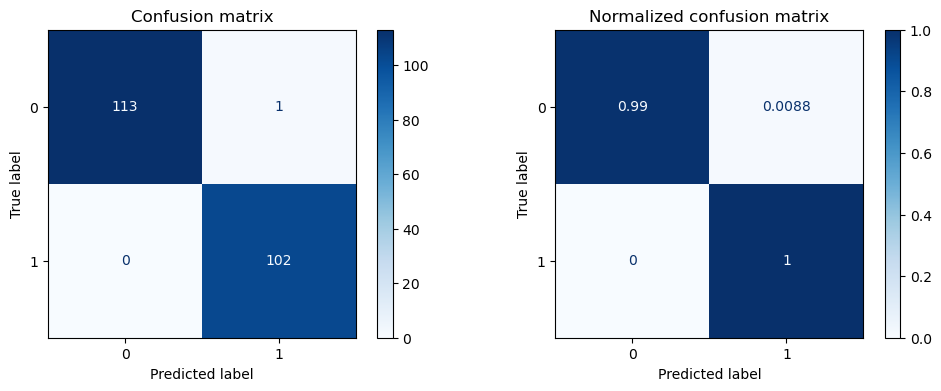

In [71]:
# Hard Voting 모델의 에측 결과 시각화
get_evaluation(y_test, h_vc_prediction, h_vc, X_test)

#### 중간 분석
- Hard Voting 모델의 경우, predict_proba를 지원하지 않음
- 따라서 해당 메소드를 사용하여 시각화할 수 있는 Trade-off와 ROC Curve는 이번 모델에서 시각화하지 않음

In [72]:
# 현재 모델에서 중요도가 가장 높은 feature 2가지로 과적합 여부를 시각화
important_features = features.loc[:, ['APP_N', 'pCASP9_N']]

important_features

,APP_N,pCASP9_N
0,0.453910,1.603310
1,0.430940,1.671738
2,0.423187,1.663550
3,0.410615,1.484624
4,0.398550,1.534835
...,...,...
1074,0.372216,1.323554
1075,0.360990,1.275605
1076,0.309978,1.437534
1077,0.341172,1.498820


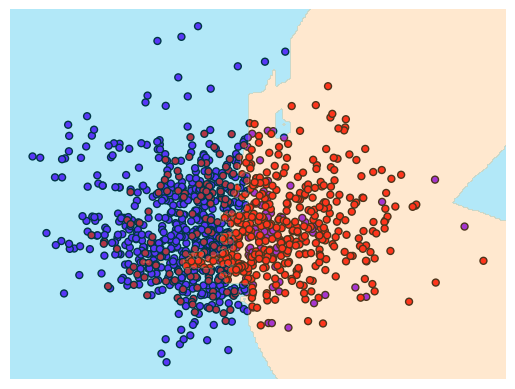

In [73]:
visualize_boundary(h_vc, important_features, targets)

#### Hard Voting 학습 결과
- 모델의 분류 성능이 거의 완벽에 가까운 양상을 보임
- 산점도와 분류 영역을 시각화 한 결과로 보더라도 과적합이 발견되지 않음

#### 4-2. Soft Voting

In [74]:
# Soft Voting을 실행하는 분류 모델 객체 생성
so_vc = VotingClassifier(estimators=[('dtc', dtc_pipe),
                                    ('svc', svc_pipe),
                                    ('knn', knn_pipe)
                                   ],
                        voting='soft',
                        n_jobs=-1)

In [75]:
# Soft Voting 모델로 학습 진행
so_vc.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('dtc',
                                               Pipeline(steps=[('standard_scaler',
                                                                StandardScaler()),
                                                               ('dtc',
                                                                DecisionTreeClassifier(max_depth=5,
                                                                                       min_samples_split=40))]))])),
                             ('svc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('svc',
                                               Pipeline(steps=[('standard_scaler',
                                                                StandardScaler()),
                                                               ('svc',
                                                                SVC(C=10,
                                                                    gamma=0.01,
                                                                    probability=True,
                                                                    random_state=124))]))])),
                             ('knn',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=3))]))],
                 n_jobs=-1, voting='soft')

In [76]:
# Soft Voting 모델로 테스트 데이터 예측
so_vc_prediction = so_vc.predict(X_test)

In [77]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(so_vc, X_test, y_test, n_repeats=10, random_state=124)

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

APP_N: 0.0417
pCASP9_N: 0.0009
SYP_N: 0.0005
Stimulated: 0.0
JNK_N: 0.0
BRAF_N: 0.0
CAMKII_N: 0.0
CREB_N: 0.0
ELK_N: 0.0
ERK_N: 0.0
GSK3B_N: 0.0
TRKA_N: 0.0
MEK_N: 0.0
pRSK_N: 0.0
RSK_N: 0.0
Bcatenin_N: 0.0
SOD1_N: 0.0
MTOR_N: 0.0
P38_N: 0.0
pMTOR_N: 0.0
AKT_N: 0.0
pPKCAB_N: 0.0
AMPKA_N: 0.0
pNR2B_N: 0.0
ITSN1_N: 0.0
BDNF_N: 0.0
NR1_N: 0.0
NR2A_N: 0.0
pAKT_N: 0.0
pBRAF_N: 0.0
pCAMKII_N: 0.0
pCREB_N: 0.0
pELK_N: 0.0
pERK_N: 0.0
pJNK_N: 0.0
PKCA_N: 0.0
pMEK_N: 0.0
pNR1_N: 0.0
pNR2A_N: 0.0
DSCR1_N: 0.0
pNUMB_N: 0.0
NR2B_N: 0.0
SHH_N: 0.0
GluR4_N: 0.0
IL1B_N: 0.0
P3525_N: 0.0
PSD95_N: 0.0
SNCA_N: 0.0
Ubiquitin_N: 0.0
pGSK3B_Tyr216_N: 0.0
BAD_N: 0.0
Treatment: 0.0
BCL2_N: 0.0
pS6_N: 0.0
pCFOS_N: 0.0
H3AcK18_N: 0.0
EGR1_N: 0.0
H3MeK4_N: 0.0
CaNA_N: 0.0
GluR3_N: 0.0
GFAP_N: 0.0
Tau_N: 0.0
nNOS_N: 0.0
RAPTOR_N: 0.0
TIAM1_N: 0.0
pP70S6_N: 0.0
NUMB_N: 0.0
P70S6_N: 0.0
pGSK3B_N: 0.0
pPKCG_N: 0.0
CDK5_N: 0.0
S6_N: 0.0
ADARB1_N: 0.0
AcetylH3K9_N: 0.0
RRP1_N: 0.0
BAX_N: 0.0
ARC_N: 0.0
ERBB4_N: 0.0
D

오차 행렬
[[113   1]
 [  0 102]]
정확도: 0.9954, 정밀도: 0.9951, 재현율: 0.9956, F1: 0.9954, ROC-AUC: 0.9956
################################################################################


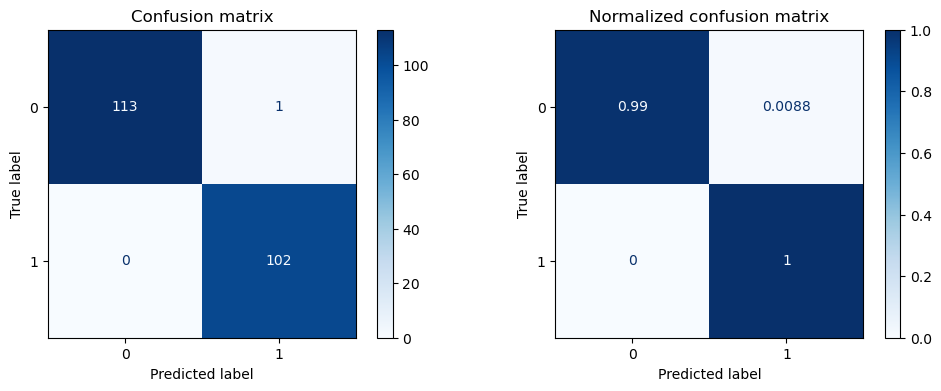

In [78]:
# Soft Voting 모델의 에측 결과 시각화
get_evaluation(y_test, so_vc_prediction, so_vc, X_test)

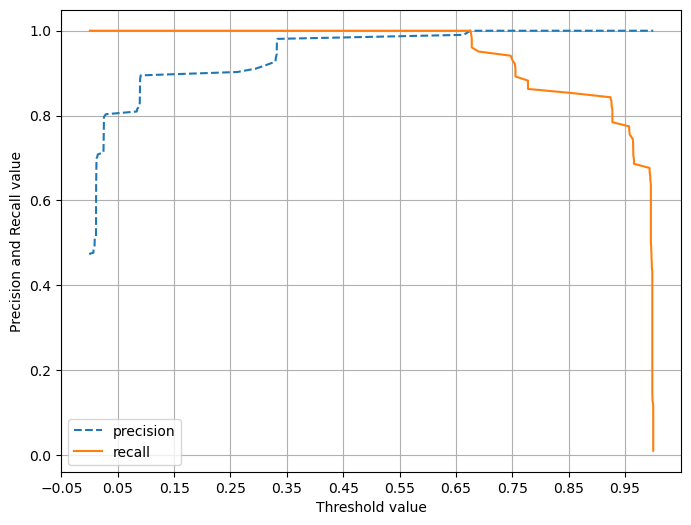

In [79]:
# 위 함수를 사용하여 정밀도와 재현율의 trade-off 시각화
precision_recall_curve_plot(y_test, so_vc.predict_proba(X_test)[:, 1].reshape(-1, 1))

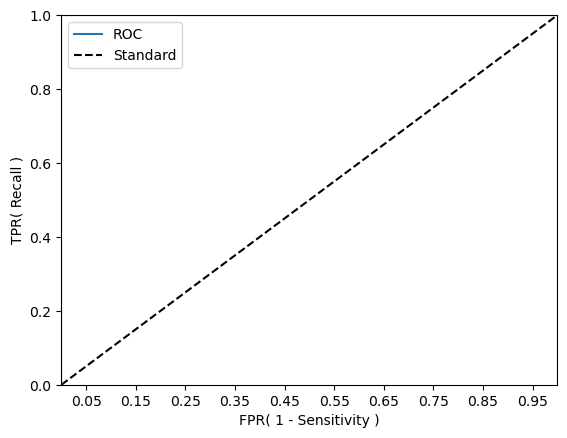

In [80]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, so_vc.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [81]:
# 현재 모델에서 중요도가 가장 높은 feature 2가지로 과적합 여부를 시각화
important_features = features.loc[:, ['APP_N', 'pCASP9_N']]

important_features

,APP_N,pCASP9_N
0,0.453910,1.603310
1,0.430940,1.671738
2,0.423187,1.663550
3,0.410615,1.484624
4,0.398550,1.534835
...,...,...
1074,0.372216,1.323554
1075,0.360990,1.275605
1076,0.309978,1.437534
1077,0.341172,1.498820


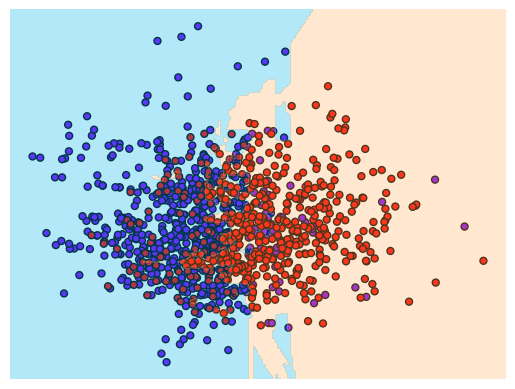

In [82]:
visualize_boundary(so_vc, important_features, targets)

#### Soft Voting 학습 결과
- Hard Voting과 Soft Voting 양쪽의 오차 행렬이 동일한 것을 확인
- 이와 같은 현상이 발생한 이유로는 Voting에 사용한 SVC와 KNN 모델의 평가 점수가 매우 높았기 때문인 것으로 추정
- 이 모델의 산점도 역시 Hard Voting과 비슷한 양상으로, 과적합은 방생하지 않음

### 5. Bagging - Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트에 사용할 하이퍼 파라미터 지정
rfc_parameters = {
    'rfc__max_depth': [3, 4, 5],
    'rfc__min_samples_split': [40, 60, 80]
}

# 랜덤 포레스트 모델 객체 생성
rfc = RandomForestClassifier(n_estimators=100, random_state=124)

# 표준화와 위 모델을 순서대로 거치는 파이프라인 생성 후, 각 하이퍼 파라미터의 조합 별로 교차 검증하는 모델 생성
rfc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('rfc', rfc)])
g_rfc = GridSearchCV(rfc_pipe, param_grid=rfc_parameters, cv=5, refit=True, return_train_score=True)

In [84]:
# 위 모델로 학습 진행
g_rfc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('rfc',
                                        RandomForestClassifier(random_state=124))]),
             param_grid={'rfc__max_depth': [3, 4, 5],
                         'rfc__min_samples_split': [40, 60, 80]},
             return_train_score=True)

In [85]:
# 랜덤 포레스트 모델의 파라미터 조합 별 평가 점수 및 순위를 데이터프레임 형식으로 제작 후 출력
# 가장 좋은 평가 점수를 받은 하이퍼 파라미터 조합도 출력
rfc_result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(rfc_result_df['params'][6])
display(rfc_result_df)

{'rfc__max_depth': 5, 'rfc__min_samples_split': 40}


,params,mean_test_score,rank_test_score
0,"{'rfc__max_depth': 3, 'rfc__min_samples_split'...",0.883516,8
1,"{'rfc__max_depth': 3, 'rfc__min_samples_split'...",0.887912,7
2,"{'rfc__max_depth': 3, 'rfc__min_samples_split'...",0.875824,9
3,"{'rfc__max_depth': 4, 'rfc__min_samples_split'...",0.916484,3
4,"{'rfc__max_depth': 4, 'rfc__min_samples_split'...",0.913187,4
5,"{'rfc__max_depth': 4, 'rfc__min_samples_split'...",0.906593,6
6,"{'rfc__max_depth': 5, 'rfc__min_samples_split'...",0.937363,1
7,"{'rfc__max_depth': 5, 'rfc__min_samples_split'...",0.930769,2
8,"{'rfc__max_depth': 5, 'rfc__min_samples_split'...",0.909890,5


#### 중간 분석
- DTC와 마찬가지로, max_depth가 5, min_samples_spilt이 40일 때 평균 평가 점수가 가장 높은 것을 확인.
- 하지만 이 때의 평가 점수는 0.93으로, DTC의 0.87보다 높은 양상을 보임

In [86]:
# 가장 좋은 평가를 받은 파라미터를 랜덤 포레스트 모델에 할당
rfc = g_rfc.best_estimator_

# 위 모델로 테스트 데이터 예측
rfc_prediction = rfc.predict(X_test)

In [87]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(rfc, X_test, y_test, n_repeats=30, random_state=124)

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

APP_N: 0.0645
Tau_N: 0.0198
SOD1_N: 0.019
pPKCAB_N: 0.0167
H3MeK4_N: 0.0123
Stimulated: 0.0122
GluR3_N: 0.012
NR2A_N: 0.012
DSCR1_N: 0.0111
SYP_N: 0.011
DYRK1A_N: 0.0108
AMPKA_N: 0.0106
ITSN1_N: 0.0106
RRP1_N: 0.0097
NR2B_N: 0.0096
GSK3B_N: 0.0096
pERK_N: 0.0093
TIAM1_N: 0.008
pCFOS_N: 0.0079
S6_N: 0.0077
BDNF_N: 0.0074
PKCA_N: 0.0071
pNUMB_N: 0.0068
MTOR_N: 0.0063
ADARB1_N: 0.0063
pMTOR_N: 0.0062
ARC_N: 0.0062
pS6_N: 0.0054
BRAF_N: 0.0052
ERK_N: 0.0051
IL1B_N: 0.0051
AcetylH3K9_N: 0.0048
pGSK3B_Tyr216_N: 0.0048
BCL2_N: 0.0046
Ubiquitin_N: 0.0045
P70S6_N: 0.0045
CaNA_N: 0.0043
pCAMKII_N: 0.0042
pNR2A_N: 0.0035
H3AcK18_N: 0.0034
pP70S6_N: 0.0032
pGSK3B_N: 0.0032
pNR1_N: 0.0029
pCASP9_N: 0.0029
Treatment: 0.0029
CDK5_N: 0.0028
NR1_N: 0.0025
pPKCG_N: 0.0023
RAPTOR_N: 0.0017
SHH_N: 0.0014
P38_N: 0.0014
ELK_N: 0.0012
GluR4_N: 0.0011
PSD95_N: 0.0011
ERBB4_N: 0.0008
P3525_N: 0.0003
AKT_N: 0.0002
pELK_N: 0.0002
pNR2B_N: 0.0002
Bcatenin_N: 0.0
BAX_N: 0.0
SNCA_N: 0.0
pBRAF_N: 0.0
BAD_N: 0.0
CREB

오차 행렬
[[111   3]
 [  5  97]]
정확도: 0.9630, 정밀도: 0.9634, 재현율: 0.9623, F1: 0.9628, ROC-AUC: 0.9623
################################################################################


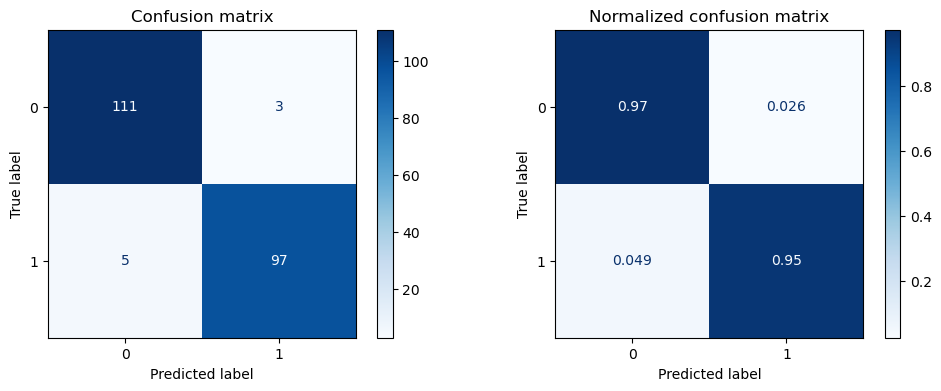

In [88]:
# 랜덤 포레스트 모델의 정확도 및 오차 행렬 출력
get_evaluation(y_test, rfc_prediction, rfc, X_test)

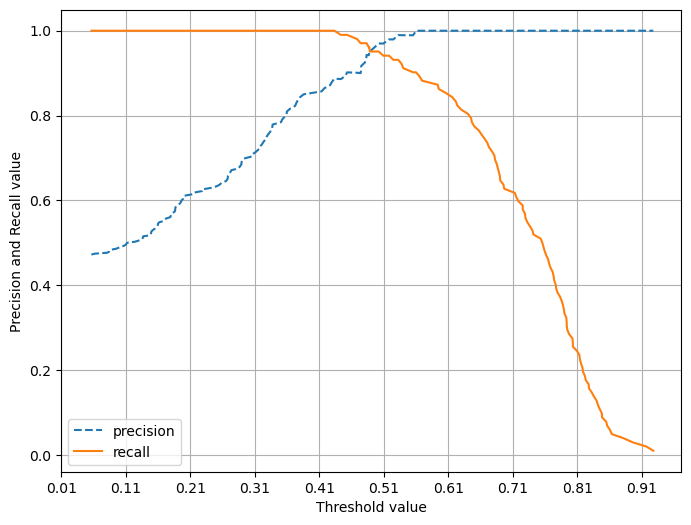

In [89]:
# 위 함수를 사용하여 정밀도와 재현율의 trade-off 시각화
precision_recall_curve_plot(y_test, rfc.predict_proba(X_test)[:, 1].reshape(-1, 1))

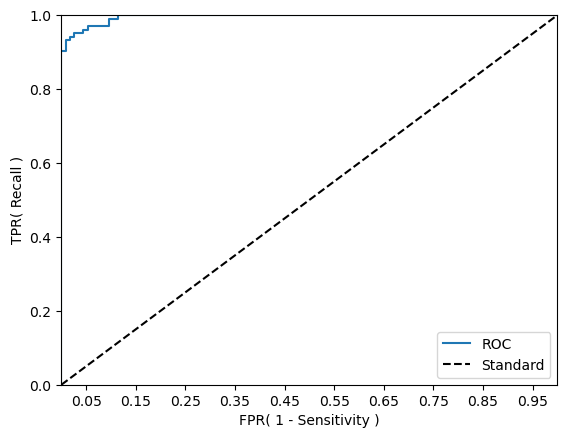

In [90]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, rfc.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [91]:
# 현재 모델에서 feature importance가 가장 높은 feature 2가지로 과적합 여부를 시각화
important_features = features.loc[:, ['APP_N', 'Tau_N']]

important_features

,APP_N,Tau_N
0,0.453910,0.125190
1,0.430940,0.134275
2,0.423187,0.132560
3,0.410615,0.123210
4,0.398550,0.136838
...,...,...
1074,0.372216,0.411286
1075,0.360990,0.402073
1076,0.309978,0.395648
1077,0.341172,0.414200


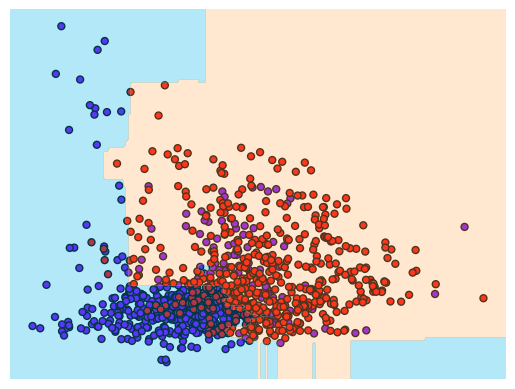

In [92]:
visualize_boundary(rfc, important_features, targets)

#### Random Forest 학습 결과
- 랜덤 포레스트 모델로 학습한 결과, 결정 트리 모델을 썼을 때에 비해서 평가 지표에서 더 우수한 결과를 보임
- 이는 무작위로 생성된 100개의 모델을 활용하여 더 많은 학습을 진행했기 때문인 것으로 추정
- 산점도와 분류 영역을 시각화 했을 때, 이번 모델에서는 과적합이 발생하지 않은 것을 확인

### 6. Boosting (부스팅)

> 1. Adaboost (Adaptive Boost)
> 2. GBM (Gradient Boosting Machine)
> 3. XGBoost (EXtra Gradient Boost)
> 4. LightGBM (Light Gradient Boosting Machine)

#### 6-1. Adaboost (Adaptive Boost)

In [93]:
from sklearn.ensemble import AdaBoostClassifier

# Adaboost의 교차 검증에 사용할 하이퍼 파라미터
ada_parameters = {
    'ada__n_estimators': [50, 100, 150],
    'ada__learning_rate': [0.3, 0.5, 0.7, 1]
}

# 표준화와 Adaboost를 거치는 파이프라인 생성 후, 해당 모델로 교차 검증
ada = AdaBoostClassifier(random_state=124)

ada_pipe = Pipeline([('standard_scaler', StandardScaler()), ('ada', ada)])
g_ada = GridSearchCV(ada_pipe, param_grid=ada_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

In [94]:
# 위 모델로 학습 및 교차 검증 진행
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('ada',
                                        AdaBoostClassifier(random_state=124))]),
             n_jobs=-1,
             param_grid={'ada__learning_rate': [0.3, 0.5, 0.7, 1],
                         'ada__n_estimators': [50, 100, 150]},
             return_train_score=True)

In [95]:
# 교차 검증 결과를 데이터프레임에 담아서 출력하고, 가장 좋은 평가를 받았을 때의 하이퍼 파라미터도 출력
ada_result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(ada_result_df['params'][10])
display(ada_result_df)

{'ada__learning_rate': 1, 'ada__n_estimators': 100}


,params,mean_test_score,rank_test_score
0,"{'ada__learning_rate': 0.3, 'ada__n_estimators...",0.919780,12
1,"{'ada__learning_rate': 0.3, 'ada__n_estimators...",0.942857,11
2,"{'ada__learning_rate': 0.3, 'ada__n_estimators...",0.951648,7
3,"{'ada__learning_rate': 0.5, 'ada__n_estimators...",0.945055,10
4,"{'ada__learning_rate': 0.5, 'ada__n_estimators...",0.954945,6
5,"{'ada__learning_rate': 0.5, 'ada__n_estimators...",0.959341,5
6,"{'ada__learning_rate': 0.7, 'ada__n_estimators...",0.950549,8
7,"{'ada__learning_rate': 0.7, 'ada__n_estimators...",0.960440,4
8,"{'ada__learning_rate': 0.7, 'ada__n_estimators...",0.963736,3
9,"{'ada__learning_rate': 1, 'ada__n_estimators':...",0.948352,9


In [96]:
# 가장 좋은 평가를 받은 파라미터를 Adaboost 모델에 할당하고, 해당 모델로 테스트 데이터 예측
ada = g_ada.best_estimator_
ada_prediction = ada.predict(X_test)

In [97]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(ada, X_test, y_test, n_repeats=30, random_state=124)

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

APP_N: 0.2164
AMPKA_N: 0.0611
pPKCAB_N: 0.0386
ITSN1_N: 0.0377
CAMKII_N: 0.0295
GluR3_N: 0.0241
pNR1_N: 0.0235
NR2B_N: 0.0228
PKCA_N: 0.0196
pNR2A_N: 0.0179
Tau_N: 0.0174
BRAF_N: 0.0165
pERK_N: 0.0159
pNUMB_N: 0.0156
pMTOR_N: 0.0151
GluR4_N: 0.0147
pPKCG_N: 0.014
P38_N: 0.0134
Ubiquitin_N: 0.0134
RRP1_N: 0.0133
pGSK3B_N: 0.0123
DSCR1_N: 0.0122
BDNF_N: 0.0105
pS6_N: 0.0102
S6_N: 0.01
pJNK_N: 0.0096
MTOR_N: 0.0094
CaNA_N: 0.0094
NR2A_N: 0.0093
BCL2_N: 0.008
Stimulated: 0.0068
AcetylH3K9_N: 0.0063
P3525_N: 0.0057
ELK_N: 0.0054
H3MeK4_N: 0.0051
Treatment: 0.0045
SOD1_N: 0.0039
IL1B_N: 0.0032
ERBB4_N: 0.0022
pCASP9_N: 0.0019
H3AcK18_N: 0.0015
TIAM1_N: 0.0011
AKT_N: 0.0
pRSK_N: 0.0
BAD_N: 0.0
pNR2B_N: 0.0
SHH_N: 0.0
pMEK_N: 0.0
SNCA_N: 0.0
pELK_N: 0.0
pCFOS_N: 0.0
pCREB_N: 0.0
pCAMKII_N: 0.0
pAKT_N: 0.0
NR1_N: 0.0
EGR1_N: 0.0
PSD95_N: 0.0
CDK5_N: 0.0
CREB_N: 0.0
ADARB1_N: 0.0
P70S6_N: 0.0
NUMB_N: 0.0
pP70S6_N: 0.0
RAPTOR_N: 0.0
BAX_N: 0.0
ARC_N: 0.0
nNOS_N: 0.0
GFAP_N: 0.0
DYRK1A_N: 0.0
Bcat

오차 행렬
[[111   3]
 [  3  99]]
정확도: 0.9722, 정밀도: 0.9721, 재현율: 0.9721, F1: 0.9721, ROC-AUC: 0.9721
################################################################################


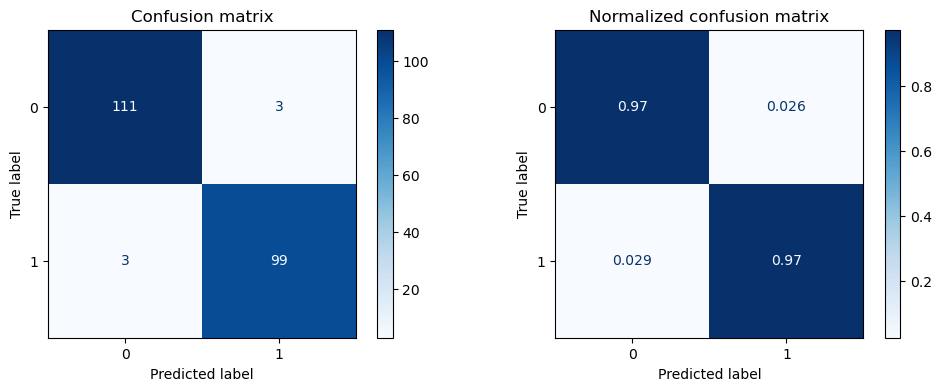

In [98]:
# 위 예측의 정확도와 오차행렬 시각화
get_evaluation(y_test, ada_prediction, ada, X_test)

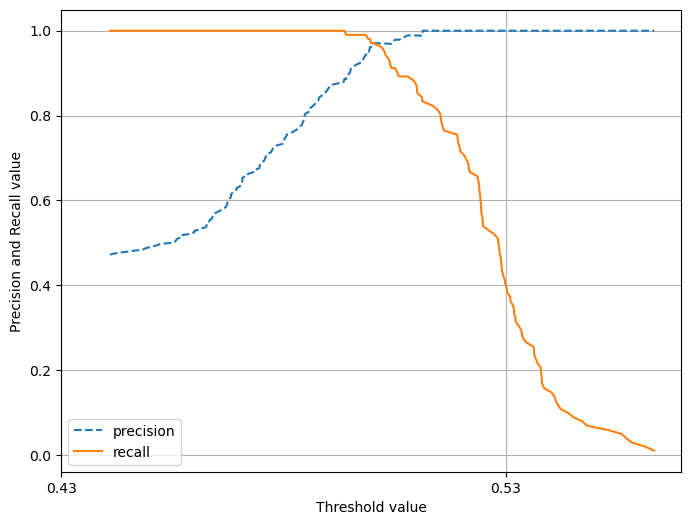

In [100]:
# 위 함수를 사용하여 정밀도와 재현율의 trade-off 시각화
precision_recall_curve_plot(y_test, ada.predict_proba(X_test)[:, 1].reshape(-1, 1))

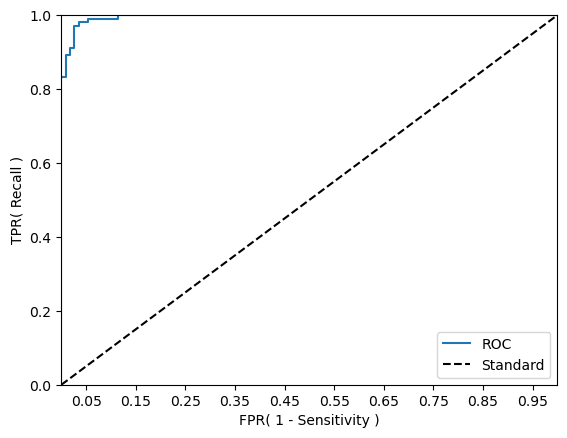

In [101]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, ada.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [102]:
# 현재 모델에서 feature importance가 가장 높은 feature 2가지로 과적합 여부를 시각화
important_features = features.loc[:, ['APP_N', 'AMPKA_N']]

important_features

,APP_N,AMPKA_N
0,0.453910,0.448099
1,0.430940,0.420876
2,0.423187,0.404630
3,0.410615,0.386860
4,0.398550,0.360816
...,...,...
1074,0.372216,0.270060
1075,0.360990,0.273472
1076,0.309978,0.234679
1077,0.341172,0.258083


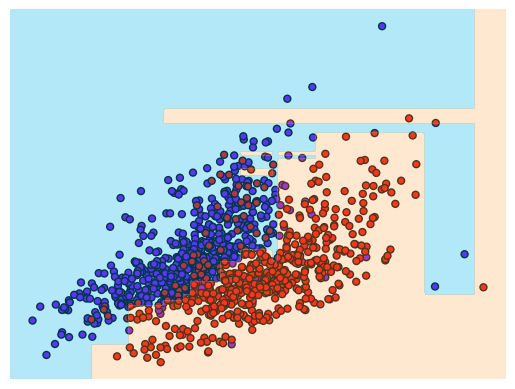

In [103]:
visualize_boundary(ada, important_features, targets)

#### Adaboost 학습 결과
- Adaboost 모델로 학습한 결과, learning_rate가 1, n_estimators가 100일 때 가장 우수한 평가 점수를 보임
- 또한 산점도와 분류 영역 시각화 결과, 과적합도 일어나지 않은 것으로 판단

#### 6-2. GBM (Gradient Boosting Machine)

In [104]:
from sklearn.ensemble import GradientBoostingClassifier

# GBM의 교차 검증에 사용할 하이퍼 파라미터
gbm_parameters = {
    'gbm__loss': ['log_loss', 'exponential'],
    'gbm__n_estimators': [50, 100, 150],
    'gbm__learning_rate': [0.3, 0.5, 0.7, 1],
    'gbm__subsample': [0.3, 0.5, 0.7, 1]
}

# 표준화와 GBM을 거치는 파이프라인 생성 후, 해당 모델로 교차 검증
gbm = GradientBoostingClassifier(random_state=124)

gbm_pipe = Pipeline([('standard_scaler', StandardScaler()), ('gbm', gbm)])
g_gbm = GridSearchCV(gbm_pipe, param_grid=gbm_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

In [105]:
# 위 모델로 학습 및 교차 검증 진행
g_gbm.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('gbm',
                                        GradientBoostingClassifier(random_state=124))]),
             n_jobs=-1,
             param_grid={'gbm__learning_rate': [0.3, 0.5, 0.7, 1],
                         'gbm__loss': ['log_loss', 'exponential'],
                         'gbm__n_estimators': [50, 100, 150],
                         'gbm__subsample': [0.3, 0.5, 0.7, 1]},
             return_train_score=True)

In [107]:
# 교차 검증 결과를 데이터프레임에 담아서 출력하고, 가장 좋은 평가를 받았을 때의 하이퍼 파라미터도 출력
gbm_result_df = pd.DataFrame(g_gbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(gbm_result_df)

,params,mean_test_score,rank_test_score
0,"{'gbm__learning_rate': 0.3, 'gbm__loss': 'log_...",0.951648,81
1,"{'gbm__learning_rate': 0.3, 'gbm__loss': 'log_...",0.975824,38
2,"{'gbm__learning_rate': 0.3, 'gbm__loss': 'log_...",0.971429,56
3,"{'gbm__learning_rate': 0.3, 'gbm__loss': 'log_...",0.975824,41
4,"{'gbm__learning_rate': 0.3, 'gbm__loss': 'log_...",0.972527,52
...,...,...,...
91,"{'gbm__learning_rate': 1, 'gbm__loss': 'expone...",0.983516,7
92,"{'gbm__learning_rate': 1, 'gbm__loss': 'expone...",0.968132,65
93,"{'gbm__learning_rate': 1, 'gbm__loss': 'expone...",0.975824,41
94,"{'gbm__learning_rate': 1, 'gbm__loss': 'expone...",0.979121,23


In [108]:
# 평가 순위가 가장 높은 하이퍼 파라미터의 조합 출력
for params in gbm_result_df[gbm_result_df['rank_test_score'] == 1]['params']:
    print(params)

{'gbm__learning_rate': 0.5, 'gbm__loss': 'log_loss', 'gbm__n_estimators': 150, 'gbm__subsample': 1}


In [109]:
# best_estimator를 쓸 수 없었기 때문에, 하이퍼 파라미터 튜닝을 마친 GBM 모델과 파이프라인 생성 후 학습
gbm = GradientBoostingClassifier(learning_rate=0.5,
                                 loss='log_loss',
                                 n_estimators=150,
                                 subsample=1,
                                 random_state=124)

gbm_pipe = Pipeline([('standard_scaler', StandardScaler()), ('gbm', gbm)])

gbm_pipe.fit(X_train_over, y_train_over)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('gbm',
                 GradientBoostingClassifier(learning_rate=0.5, n_estimators=150,
                                            random_state=124, subsample=1))])

In [110]:
# 위 모델로 테스트 데이터 예측
gbm_prediction = gbm_pipe.predict(X_test)

In [111]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(gbm_pipe, X_test, y_test, n_repeats=30, random_state=124)

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

APP_N: 0.2458
ITSN1_N: 0.0313
AMPKA_N: 0.0262
pPKCAB_N: 0.0144
pGSK3B_N: 0.011
GluR3_N: 0.0093
Tau_N: 0.0086
pMTOR_N: 0.0073
AcetylH3K9_N: 0.0069
CaNA_N: 0.0066
Ubiquitin_N: 0.006
NR2B_N: 0.0057
pPKCG_N: 0.0056
CAMKII_N: 0.0046
pAKT_N: 0.0045
pNUMB_N: 0.0043
TRKA_N: 0.004
GSK3B_N: 0.0035
P38_N: 0.0031
SOD1_N: 0.0028
ERBB4_N: 0.0025
Stimulated: 0.0025
pERK_N: 0.0023
SYP_N: 0.0023
BDNF_N: 0.0014
pNR1_N: 0.0012
BRAF_N: 0.0012
MTOR_N: 0.0009
S6_N: 0.0008
DSCR1_N: 0.0006
TIAM1_N: 0.0006
ELK_N: 0.0006
ADARB1_N: 0.0006
IL1B_N: 0.0005
pNR2A_N: 0.0003
JNK_N: 0.0003
H3AcK18_N: 0.0002
pCFOS_N: 0.0002
DYRK1A_N: 0.0002
NR2A_N: 0.0
MEK_N: 0.0
pELK_N: 0.0
pMEK_N: 0.0
pCREB_N: 0.0
pCAMKII_N: 0.0
pBRAF_N: 0.0
pRSK_N: 0.0
AKT_N: 0.0
EGR1_N: 0.0
NR1_N: 0.0
H3MeK4_N: 0.0
GFAP_N: 0.0
nNOS_N: 0.0
Treatment: 0.0
ARC_N: 0.0
BAX_N: 0.0
CDK5_N: 0.0
P3525_N: 0.0
pCASP9_N: 0.0
P70S6_N: 0.0
NUMB_N: 0.0
pP70S6_N: 0.0
RSK_N: 0.0
RAPTOR_N: 0.0
PSD95_N: 0.0
SNCA_N: 0.0
pGSK3B_Tyr216_N: 0.0
SHH_N: 0.0
BAD_N: 0.0
Bcaten

오차 행렬
[[112   2]
 [  1 101]]
정확도: 0.9861, 정밀도: 0.9859, 재현율: 0.9863, F1: 0.9861, ROC-AUC: 0.9863
################################################################################


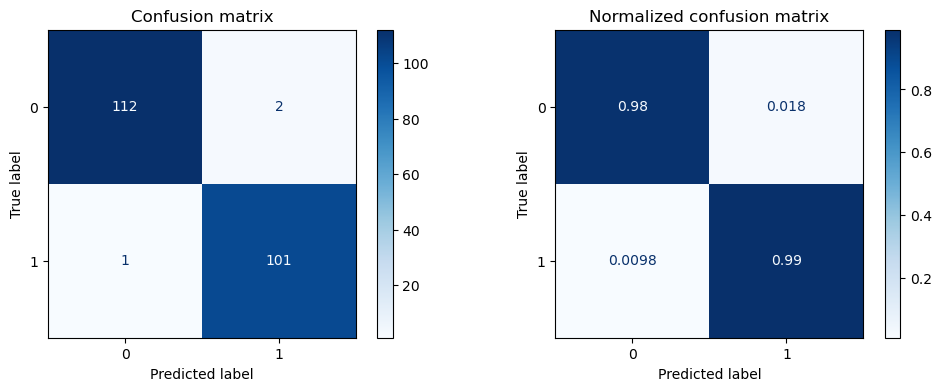

In [112]:
# 위 모델의 정확도 및 오차 행렬 시각화
get_evaluation(y_test, gbm_prediction, gbm_pipe, X_test)

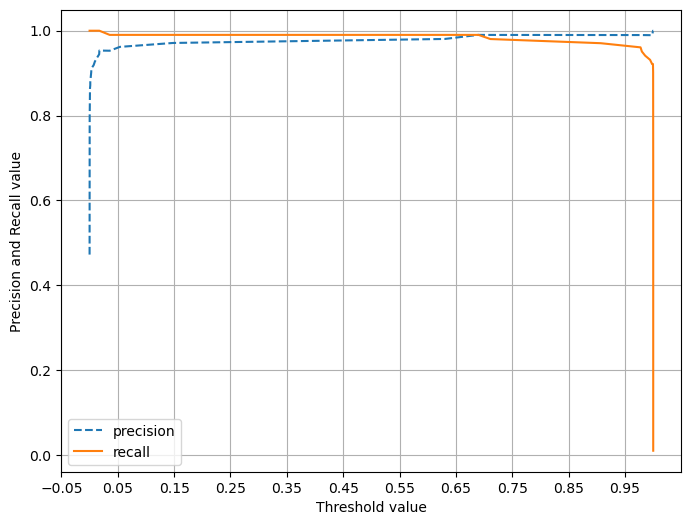

In [113]:
# 위 함수를 사용하여 정밀도와 재현율의 trade-off 시각화
precision_recall_curve_plot(y_test, gbm_pipe.predict_proba(X_test)[:, 1].reshape(-1, 1))

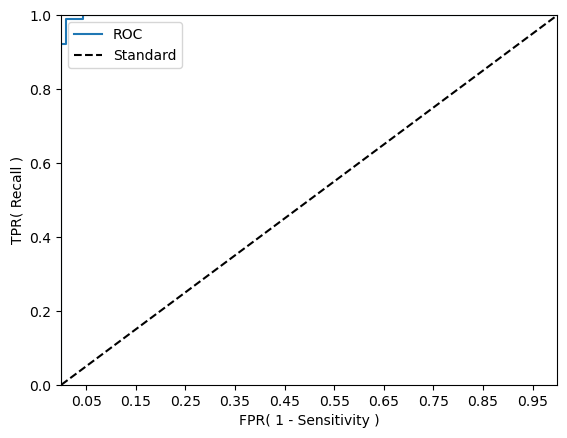

In [114]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, gbm_pipe.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [115]:
# 현재 모델에서 feature importance가 가장 높은 feature 2가지로 과적합 여부를 시각화
important_features = features.loc[:, ['APP_N', 'ITSN1_N']]

important_features

,APP_N,ITSN1_N
0,0.453910,0.747193
1,0.430940,0.689064
2,0.423187,0.730247
3,0.410615,0.617076
4,0.398550,0.617430
...,...,...
1074,0.372216,0.463591
1075,0.360990,0.474163
1076,0.309978,0.395179
1077,0.341172,0.412894


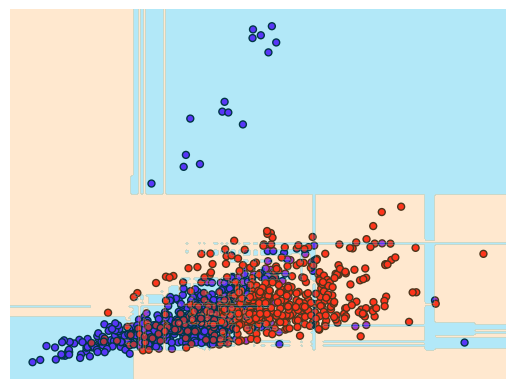

In [116]:
visualize_boundary(gbm_pipe, important_features, targets)

In [ ]:
gbm_pipe.fit(new_X_train_over, new_y_train_over)

In [ ]:
gbm_prediction = gbm_pipe.predict(new_X_test)

In [ ]:
get_evaluation(new_y_test, gbm_prediction, gbm_pipe, new_X_test)

In [ ]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, gbm_pipe.predict_proba(X_test)[:, 1].reshape(-1, 1))

#### GBM 학습 결과
- GBM 학습 결과, learning_rate는 0.5, n_estimators는 150,  
  subsample은 1이고, 로그 손실 함수를 사용한 모델의 평가 점수가 가장 높은 것을 확인함
- subsample이 1로 되었기 때문에 과적합이 발생

#### 6-3. XGBoost (Extra Gradient Boost)

In [117]:
from xgboost import XGBClassifier

# 학습용 데이터를 한 번 더 분리하여 evalset에 사용할 데이터 생성
X_val_train, X_val_test, y_val_train, y_val_test = \
                train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

# SMOTE로 위 데이터 오버 샘플링
X_val_train_over, y_val_train_over = smote.fit_resample(X_val_train, y_val_train)

# evalset 생성
evals = [(X_val_train_over, y_val_train_over), (X_val_test, y_val_test)]

y_val_train_over.value_counts()

Target
0    364
1    364
Name: count, dtype: int64

In [118]:
# XGBoost의 교차 검증에 사용할 하이퍼 파라미터
xgb_parameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.3, 0.5, 0.7, 1],
    'subsample': [0.3, 0.5, 0.7, 1],
    'early_stopping_rounds': [10, 30, 50, 70, 100]
}

# XGBoost 모델로 교차 검증
xgb = XGBClassifier(seed=124)

g_xgb = GridSearchCV(xgb, param_grid=xgb_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

In [119]:
# 위 모델로 교차 검증 진행
g_xgb.fit(X_train_over, y_train_over, eval_set=evals)

[0]	validation_0-logloss:0.49939	validation_1-logloss:0.51149
[1]	validation_0-logloss:0.37276	validation_1-logloss:0.38000
[2]	validation_0-logloss:0.30087	validation_1-logloss:0.29936
[3]	validation_0-logloss:0.23621	validation_1-logloss:0.23121
[4]	validation_0-logloss:0.18895	validation_1-logloss:0.18426
[5]	validation_0-logloss:0.15681	validation_1-logloss:0.15009
[6]	validation_0-logloss:0.12724	validation_1-logloss:0.12392
[7]	validation_0-logloss:0.10529	validation_1-logloss:0.10398
[8]	validation_0-logloss:0.09057	validation_1-logloss:0.08854
[9]	validation_0-logloss:0.07837	validation_1-logloss:0.07501
[10]	validation_0-logloss:0.06778	validation_1-logloss:0.06707
[11]	validation_0-logloss:0.06013	validation_1-logloss:0.05804
[12]	validation_0-logloss:0.05284	validation_1-logloss:0.05072
[13]	validation_0-logloss:0.04780	validation_1-logloss:0.04563
[14]	validation_0-logloss:0.04330	validation_1-logloss:0.04132
[15]	validation_0-logloss:0.03798	validation_1-logloss:0.03705
[1

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'early_stopping_rounds': [10, 30, 50, 70, 100],
                         'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.3, 0.5, 0.7, 1]},
             return_train_score=True)

In [120]:
# 교차 검증 결과를 데이터프레임에 담아서 출력하고, 가장 좋은 평가를 받았을 때의 하이퍼 파라미터도 출력
xgb_result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

for params in xgb_result_df[xgb_result_df['rank_test_score'] == 1]['params']:
    print(params)

display(xgb_result_df)

{'early_stopping_rounds': 10, 'learning_rate': 0.3, 'n_estimators': 50, 'subsample': 0.7}
{'early_stopping_rounds': 30, 'learning_rate': 0.3, 'n_estimators': 50, 'subsample': 0.7}
{'early_stopping_rounds': 50, 'learning_rate': 0.3, 'n_estimators': 50, 'subsample': 0.7}
{'early_stopping_rounds': 70, 'learning_rate': 0.3, 'n_estimators': 50, 'subsample': 0.7}
{'early_stopping_rounds': 100, 'learning_rate': 0.3, 'n_estimators': 50, 'subsample': 0.7}


,params,mean_test_score,rank_test_score
0,"{'early_stopping_rounds': 10, 'learning_rate':...",0.964835,159
1,"{'early_stopping_rounds': 10, 'learning_rate':...",0.976923,17
2,"{'early_stopping_rounds': 10, 'learning_rate':...",0.981319,1
3,"{'early_stopping_rounds': 10, 'learning_rate':...",0.975824,33
4,"{'early_stopping_rounds': 10, 'learning_rate':...",0.971429,70
...,...,...,...
235,"{'early_stopping_rounds': 100, 'learning_rate'...",0.963736,164
236,"{'early_stopping_rounds': 100, 'learning_rate'...",0.938462,235
237,"{'early_stopping_rounds': 100, 'learning_rate'...",0.953846,201
238,"{'early_stopping_rounds': 100, 'learning_rate'...",0.971429,70


In [121]:
# 가장 좋은 평가를 받은 파라미터를 XGboost 모델에 할당하고, 해당 모델로 테스트 데이터 예측
xgb = g_xgb.best_estimator_
xgb_prediction = xgb.predict(X_test)

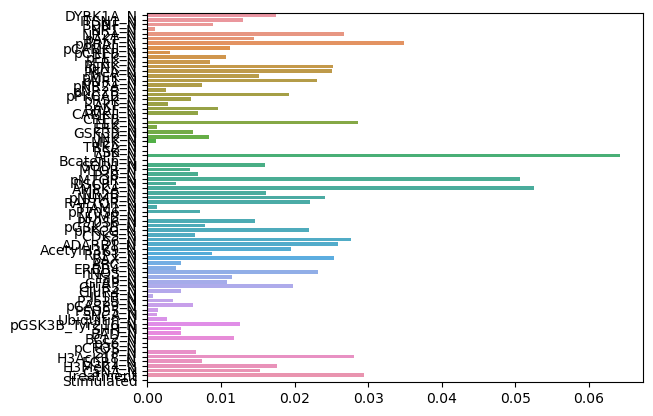

In [134]:
# 각 feature가 target에 미치는 영향을 바 플롯으로 시각화
sns.barplot(x=xgb.feature_importances_, y=features.columns)
plt.show()

In [122]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(xgb, X_test, y_test, n_repeats=10, random_state=124)

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

APP_N: 0.2227
AMPKA_N: 0.0255
ITSN1_N: 0.0134
Tau_N: 0.013
SOD1_N: 0.0106
pNR2A_N: 0.0079
pNUMB_N: 0.0079
AcetylH3K9_N: 0.0056
pPKCG_N: 0.0046
BRAF_N: 0.0046
GluR3_N: 0.0042
P70S6_N: 0.0037
pERK_N: 0.0032
RAPTOR_N: 0.0028
H3MeK4_N: 0.0028
P3525_N: 0.0019
EGR1_N: 0.0019
TIAM1_N: 0.0014
CAMKII_N: 0.0009
ELK_N: 0.0009
pCAMKII_N: 0.0005
pELK_N: 0.0
NR1_N: 0.0
DSCR1_N: 0.0
pAKT_N: 0.0
pMTOR_N: 0.0
pBRAF_N: 0.0
Bcatenin_N: 0.0
pMEK_N: 0.0
AKT_N: 0.0
RSK_N: 0.0
TRKA_N: 0.0
MEK_N: 0.0
JNK_N: 0.0
ERK_N: 0.0
pNR2B_N: 0.0
pRSK_N: 0.0
CREB_N: 0.0
Stimulated: 0.0
PSD95_N: 0.0
ARC_N: 0.0
H3AcK18_N: 0.0
pCFOS_N: 0.0
pS6_N: 0.0
BAD_N: 0.0
pGSK3B_Tyr216_N: 0.0
SNCA_N: 0.0
pCASP9_N: 0.0
IL1B_N: 0.0
GluR4_N: 0.0
GFAP_N: 0.0
DYRK1A_N: 0.0
BAX_N: 0.0
pP70S6_N: 0.0
ADARB1_N: 0.0
pGSK3B_N: 0.0
NUMB_N: 0.0
SYP_N: -0.0005
NR2B_N: -0.0005
MTOR_N: -0.0005
BCL2_N: -0.0009
pJNK_N: -0.0009
CDK5_N: -0.0009
BDNF_N: -0.0014
Ubiquitin_N: -0.0014
GSK3B_N: -0.0014
pCREB_N: -0.0019
pPKCAB_N: -0.0023
pNR1_N: -0.0023
ERBB4_

오차 행렬
[[109   5]
 [  2 100]]
정확도: 0.9676, 정밀도: 0.9672, 재현율: 0.9683, F1: 0.9675, ROC-AUC: 0.9683
################################################################################


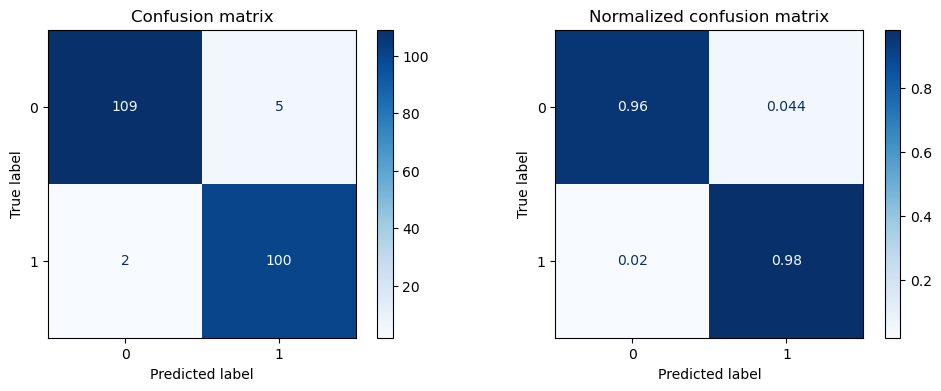

In [123]:
get_evaluation(y_test, xgb_prediction, xgb, X_test)

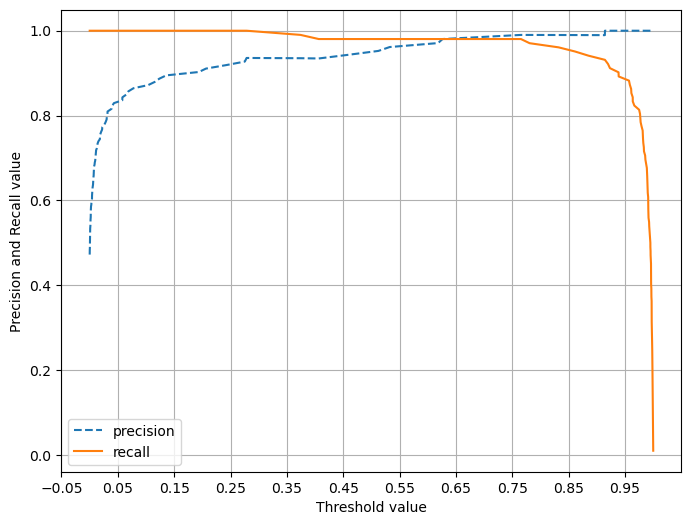

In [124]:
# 위 함수를 사용하여 정밀도와 재현율의 trade-off 시각화
precision_recall_curve_plot(y_test, xgb.predict_proba(X_test)[:, 1].reshape(-1, 1))

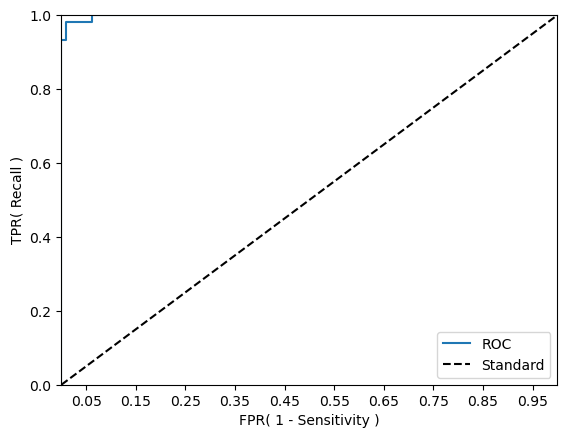

In [125]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, xgb.predict_proba(X_test)[:, 1].reshape(-1, 1))

#### XGBoost 모델 학습 결과
- XGBoost 모델 학습 결과, learning_rate는 0.3, n_estimators는 50,  
  subsample은 0.7, early_stopping_rounds는 10인 모델의 평가 점수가 가장 높은 것을 확인
- 가장 높은 평가 점수를 보인 하이퍼 파라미터 조합들에서 early_stopping_rounds를 제외한  
  나머지 값들이 전부 같았기 때문에, 사전에 설정한 early_stopping_rounds 이전에  
  학습이 완료되었다는 것을 알 수 있음
- 산점도와 분류 영역을 시각화하는 함수가 XGBoost 모델과 아래의 LightGBM에는 호환되지 않았기 때문에  
  해당 모델에서는 산점도를 시각화하지 않음

#### 6-4. LightGBM(Light Gradient Boosting Machine)

In [126]:
from lightgbm import LGBMClassifier

# LightGBM의 교차 검증에 사용할 하이퍼 파라미터
lgbm_parameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.3, 0.5, 0.7, 1],
    'subsample': [0.3, 0.5, 0.7, 1]
}

# LightGBM 모델 객체를 만든 뒤, 위의 하이퍼 파라미터 별로 교차 검증
lgbm = LGBMClassifier(seed=124)
g_lgbm = GridSearchCV(lgbm, param_grid=lgbm_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

In [127]:
# 위 모델로 학습 및 교차 검증 실행
g_lgbm.fit(X_train_over, y_train_over, eval_set=evals)

[LightGBM] [Info] Number of positive: 455, number of negative: 455
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001863 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19639
[LightGBM] [Info] Number of data points in the train set: 910, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


GridSearchCV(cv=5, estimator=LGBMClassifier(seed=124), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.3, 0.5, 0.7, 1]},
             return_train_score=True)

In [137]:
# 위 모델의 학습 결과를 데이터프레잉으로 작성 후 출력
lgbm_result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

display(lgbm_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50, 'su...",0.985714,1
1,"{'learning_rate': 0.3, 'n_estimators': 50, 'su...",0.985714,1
2,"{'learning_rate': 0.3, 'n_estimators': 50, 'su...",0.985714,1
3,"{'learning_rate': 0.3, 'n_estimators': 50, 'su...",0.985714,1
4,"{'learning_rate': 0.3, 'n_estimators': 100, 's...",0.983516,21
5,"{'learning_rate': 0.3, 'n_estimators': 100, 's...",0.983516,21
6,"{'learning_rate': 0.3, 'n_estimators': 100, 's...",0.983516,21
7,"{'learning_rate': 0.3, 'n_estimators': 100, 's...",0.983516,21
8,"{'learning_rate': 0.3, 'n_estimators': 150, 's...",0.983516,21
9,"{'learning_rate': 0.3, 'n_estimators': 150, 's...",0.983516,21


In [136]:
# 가장 좋은 평가를 받은 하이퍼 파라미터 조합도 확인
for params in lgbm_result_df[lgbm_result_df['rank_test_score'] == 1]['params']:
    print(params)   

{'learning_rate': 0.3, 'n_estimators': 50, 'subsample': 0.3}
{'learning_rate': 0.3, 'n_estimators': 50, 'subsample': 0.5}
{'learning_rate': 0.3, 'n_estimators': 50, 'subsample': 0.7}
{'learning_rate': 0.3, 'n_estimators': 50, 'subsample': 1}
{'learning_rate': 0.5, 'n_estimators': 50, 'subsample': 0.3}
{'learning_rate': 0.5, 'n_estimators': 50, 'subsample': 0.5}
{'learning_rate': 0.5, 'n_estimators': 50, 'subsample': 0.7}
{'learning_rate': 0.5, 'n_estimators': 50, 'subsample': 1}
{'learning_rate': 1, 'n_estimators': 50, 'subsample': 0.3}
{'learning_rate': 1, 'n_estimators': 50, 'subsample': 0.5}
{'learning_rate': 1, 'n_estimators': 50, 'subsample': 0.7}
{'learning_rate': 1, 'n_estimators': 50, 'subsample': 1}
{'learning_rate': 1, 'n_estimators': 100, 'subsample': 0.3}
{'learning_rate': 1, 'n_estimators': 100, 'subsample': 0.5}
{'learning_rate': 1, 'n_estimators': 100, 'subsample': 0.7}
{'learning_rate': 1, 'n_estimators': 100, 'subsample': 1}
{'learning_rate': 1, 'n_estimators': 150, 's

In [138]:
# 가장 좋은 평가 점수를 받은 하이퍼 파라미터로 튜닝한 모델을 lgbm 변수에 저장
lgbm = g_lgbm.best_estimator_

# 해당 모델로 테스트 데이터 예측
lgbm_prediction = lgbm.predict(X_test)

In [139]:
# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(lgbm, X_test, y_test, n_repeats=30, random_state=124)

for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

APP_N: 0.2457
AMPKA_N: 0.0404
ITSN1_N: 0.0208
GluR3_N: 0.012
AcetylH3K9_N: 0.0099
NR2B_N: 0.0083
pPKCG_N: 0.0057
Tau_N: 0.0046
RRP1_N: 0.004
MTOR_N: 0.0035
SHH_N: 0.0035
BRAF_N: 0.0034
DYRK1A_N: 0.0034
SOD1_N: 0.0034
S6_N: 0.0034
PKCA_N: 0.0031
SYP_N: 0.0025
P38_N: 0.0023
pPKCAB_N: 0.002
CAMKII_N: 0.0019
pJNK_N: 0.0017
pAKT_N: 0.0017
DSCR1_N: 0.0015
CaNA_N: 0.0015
ERK_N: 0.0012
NR2A_N: 0.0012
BAX_N: 0.0012
pCREB_N: 0.0011
JNK_N: 0.0011
NR1_N: 0.0009
H3AcK18_N: 0.0009
RSK_N: 0.0009
PSD95_N: 0.0009
ADARB1_N: 0.0008
Ubiquitin_N: 0.0008
H3MeK4_N: 0.0006
pNUMB_N: 0.0005
TIAM1_N: 0.0
pERK_N: 0.0
pRSK_N: 0.0
pCASP9_N: 0.0
pNR2B_N: 0.0
pNR2A_N: 0.0
pNR1_N: 0.0
pMEK_N: 0.0
SNCA_N: 0.0
pGSK3B_Tyr216_N: 0.0
pELK_N: 0.0
RAPTOR_N: 0.0
BAD_N: 0.0
pCAMKII_N: 0.0
pBRAF_N: 0.0
BCL2_N: 0.0
pS6_N: 0.0
pCFOS_N: 0.0
BDNF_N: 0.0
EGR1_N: 0.0
AKT_N: 0.0
P3525_N: 0.0
IL1B_N: 0.0
CREB_N: 0.0
Treatment: 0.0
pP70S6_N: 0.0
NUMB_N: 0.0
P70S6_N: 0.0
pMTOR_N: 0.0
pGSK3B_N: 0.0
CDK5_N: 0.0
ARC_N: 0.0
Bcatenin_N: 0.0
E

오차 행렬
[[113   1]
 [  0 102]]
정확도: 0.9954, 정밀도: 0.9951, 재현율: 0.9956, F1: 0.9954, ROC-AUC: 0.9956
################################################################################


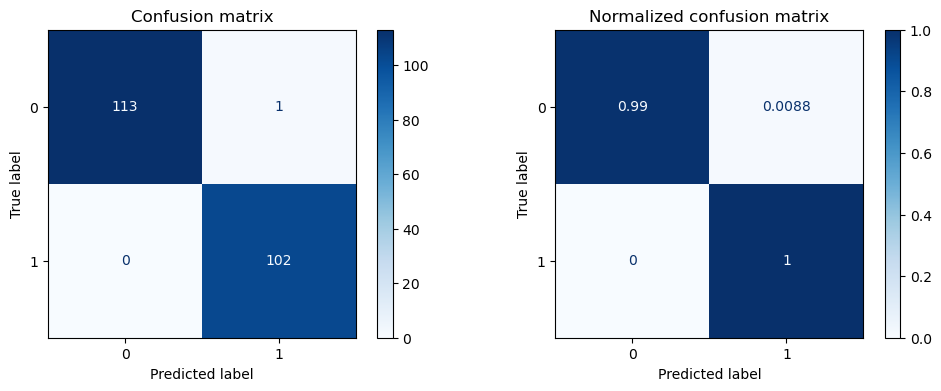

In [140]:
get_evaluation(y_test, lgbm_prediction, lgbm, X_test)

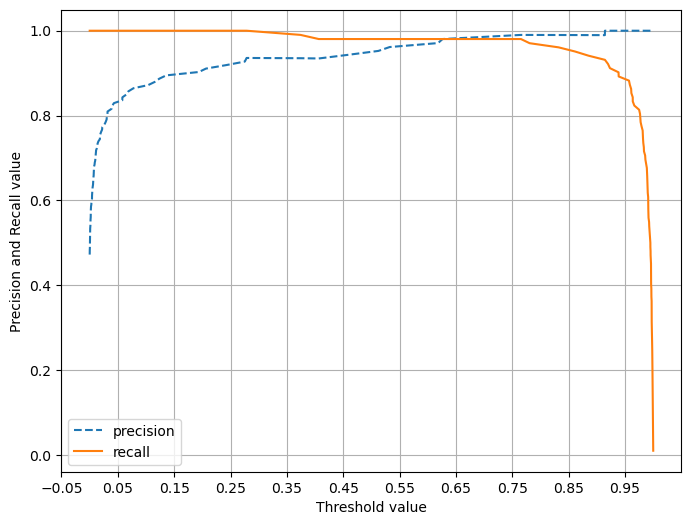

In [141]:
# 위 함수를 사용하여 정밀도와 재현율의 trade-off 시각화
precision_recall_curve_plot(y_test, xgb.predict_proba(X_test)[:, 1].reshape(-1, 1))

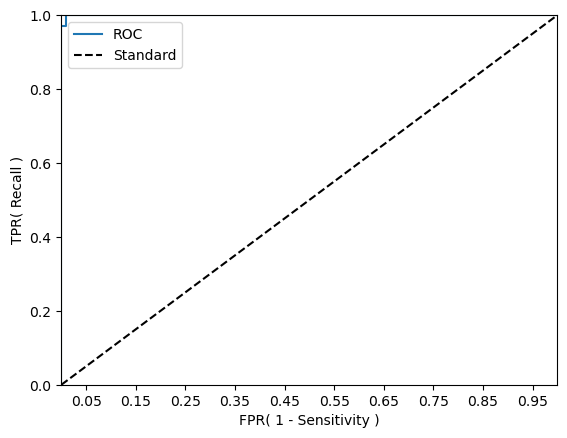

In [142]:
# 위 함수를 사용하여 ROC Curve를 시각화
roc_curve_plot(y_test, lgbm.predict_proba(X_test)[:, 1].reshape(-1, 1))

#### LightGBM 학습 결과
- 거의 모든 예측을 성공한 모델이 도출됨
- XGB와 비교했을 때, 평가 점수가 상승한 것을 확인

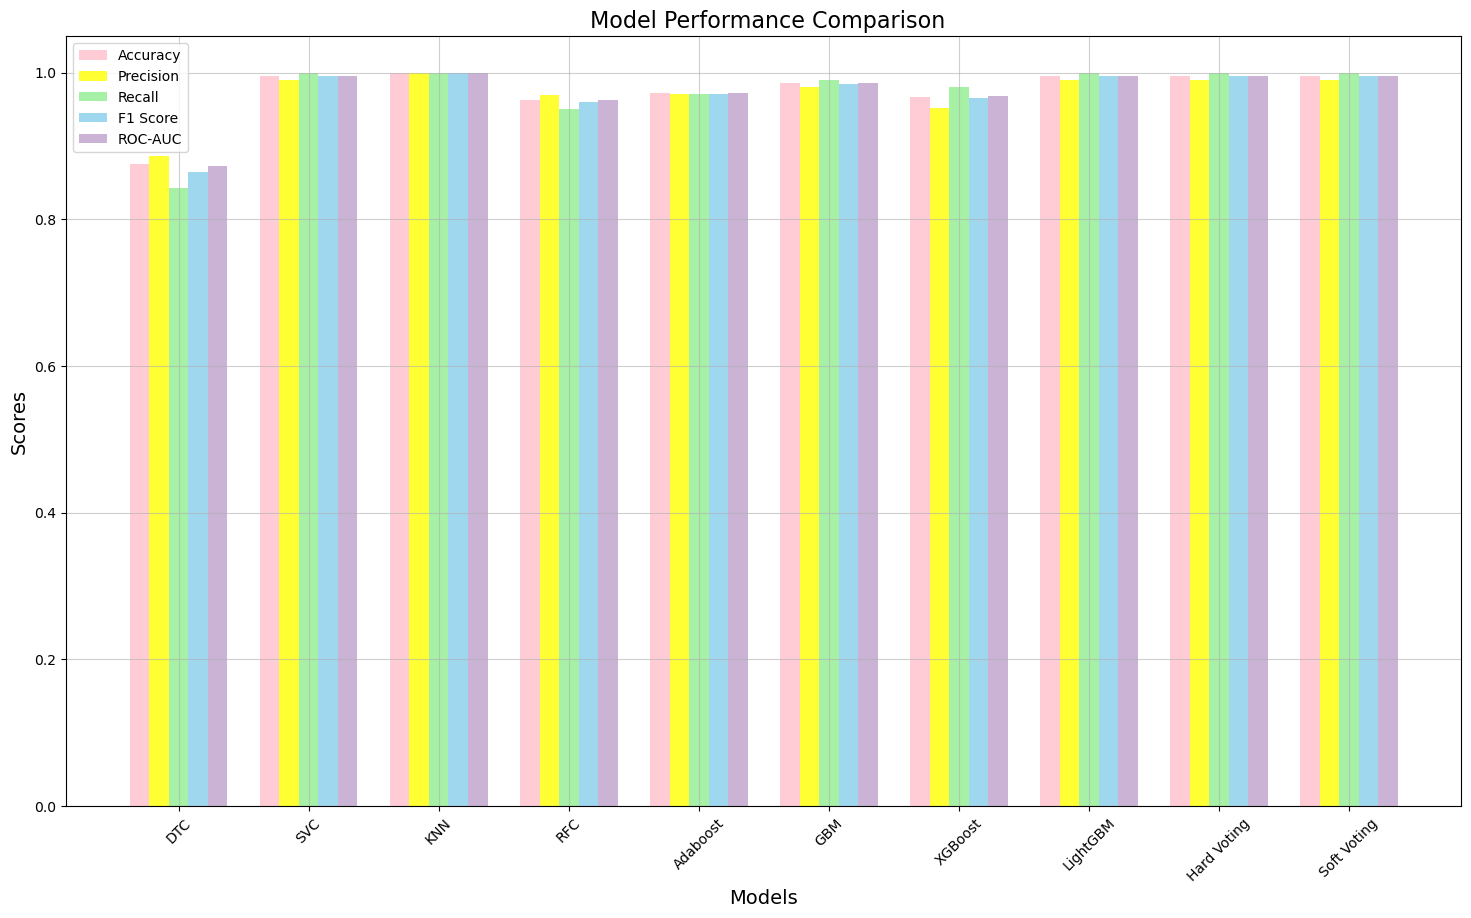

In [143]:
 import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
models = [
    "DTC", "SVC", "KNN", "RFC", "Adaboost", "GBM",
    "XGBoost", "LightGBM", "Hard Voting", "Soft Voting"
]

# 모델 별 정확도
accuracies = [accuracy_score(y_test, dtc_prediction), accuracy_score(y_test, svc_prediction),
              accuracy_score(y_test, knn_prediction), accuracy_score(y_test, rfc_prediction),
              accuracy_score(y_test, ada_prediction), accuracy_score(y_test, gbm_prediction),
              accuracy_score(y_test, xgb_prediction), accuracy_score(y_test, lgbm_prediction),
              accuracy_score(y_test, h_vc_prediction), accuracy_score(y_test, so_vc_prediction)]

# 모델 별 정밀도
precisions = [precision_score(y_test, dtc_prediction), precision_score(y_test, svc_prediction),
              precision_score(y_test, knn_prediction), precision_score(y_test, rfc_prediction),
              precision_score(y_test, ada_prediction), precision_score(y_test, gbm_prediction),
              precision_score(y_test, xgb_prediction), precision_score(y_test, lgbm_prediction),
              precision_score(y_test, h_vc_prediction), precision_score(y_test, so_vc_prediction)]

# 모델 별 재현율
recalls = [recall_score(y_test, dtc_prediction), recall_score(y_test, svc_prediction),
           recall_score(y_test, knn_prediction), recall_score(y_test, rfc_prediction),
           recall_score(y_test, ada_prediction), recall_score(y_test, gbm_prediction),
           recall_score(y_test, xgb_prediction), recall_score(y_test, lgbm_prediction),
           recall_score(y_test, h_vc_prediction), recall_score(y_test, so_vc_prediction)]

# 모델 별 F1 Score
f1_scores = [f1_score(y_test, dtc_prediction), f1_score(y_test, svc_prediction),
             f1_score(y_test, knn_prediction), f1_score(y_test, rfc_prediction),
             f1_score(y_test, ada_prediction), f1_score(y_test, gbm_prediction),
             f1_score(y_test, xgb_prediction), f1_score(y_test, lgbm_prediction),
             f1_score(y_test, h_vc_prediction), f1_score(y_test, so_vc_prediction)]

# 모델 별 ROC-AUC 점수
roc_aucs = [roc_auc_score(y_test, dtc_prediction), roc_auc_score(y_test, svc_prediction),
            roc_auc_score(y_test, knn_prediction), roc_auc_score(y_test, rfc_prediction),
            roc_auc_score(y_test, ada_prediction), roc_auc_score(y_test, gbm_prediction),
            roc_auc_score(y_test, xgb_prediction), roc_auc_score(y_test, lgbm_prediction),
            roc_auc_score(y_test, h_vc_prediction), roc_auc_score(y_test, so_vc_prediction)]

# 그래프 설정
n_groups = len(models)
index = np.arange(n_groups)
bar_width = 0.15

fig, ax = plt.subplots(figsize=(18, 10))
bar1 = ax.bar(index, accuracies, bar_width, label='Accuracy', alpha=0.8, color='pink')
bar2 = ax.bar(index + bar_width, precisions, bar_width, label='Precision', alpha=0.8, color='yellow')
bar3 = ax.bar(index + 2*bar_width, recalls, bar_width, label='Recall', alpha=0.8, color='lightgreen')
bar4 = ax.bar(index + 3*bar_width, f1_scores, bar_width, label='F1 Score', alpha=0.8, color='skyblue')
bar5 = ax.bar(index + 4*bar_width, roc_aucs, bar_width, label='ROC-AUC', alpha=0.8, color='#bda0cb')

# 레이블, 타이틀, 범례 설정
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title(' Model Performance Comparison', fontsize=16)
ax.set_xticks(index + 2*bar_width)
ax.set_xticklabels(models, rotation=45)
ax.legend()

# 그리드 추가
plt.grid(True, linestyle='solid', alpha=0.6)
plt.show()

### 📑 최종 정리
- 이번 데이터 세트에 대해 개별 모델 학습에서는 KNN이,  
  앙상블 학습에서는 LightGBM이 가장 우수한 평가를 기록했습니다.
- 다만 데이터의 과적합 여부도 고려해봤을 때, DTC와 Random Forest 역시  
  이번 데이터에 사용하기 적합한 모델이라고 할 수 있습니다.

### ☕ 회고
- feature의 개수가 많은 것에 비해 전처리 과정이 미숙했습니다.
- 또한 모델의 부적절성에 대해 사이클을 돌려 결점을 채우지 못한 점도 반성할 사항입니다.